In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

faces=fetch_olivetti_faces()
X,y=faces.data,faces.target

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index,test_index in sss.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
X_train.shape
def model_without_clustering():
    model=keras.Sequential()
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(20,activation="relu",kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(20,activation="relu",kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(40,activation="softmax",kernel_initializer="he_normal"))
    model.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])
    return model

In [2]:
olivetti_model=model_without_clustering()
olivetti_model.fit(X_train,y_train,epochs=5000, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/5000
10/10 [==============================] - 0s 23ms/step - loss: 4.0001 - accuracy: 0.0437 - val_loss: 6.0799 - val_accuracy: 0.0250
Epoch 2/5000
10/10 [==============================] - 0s 4ms/step - loss: 3.1946 - accuracy: 0.1719 - val_loss: 5.3408 - val_accuracy: 0.0375
Epoch 3/5000
10/10 [==============================] - 0s 4ms/step - loss: 2.8325 - accuracy: 0.2313 - val_loss: 5.0640 - val_accuracy: 0.0250
Epoch 4/5000
10/10 [==============================] - 0s 4ms/step - loss: 2.3978 - accuracy: 0.3594 - val_loss: 3.9603 - val_accuracy: 0.1000
Epoch 5/5000
10/10 [==============================] - 0s 4ms/step - loss: 2.2208 - accuracy: 0.3719 - val_loss: 3.9483 - val_accuracy: 0.0625
Epoch 6/5000
10/10 [==============================] - 0s 4ms/step - loss: 2.0453 - accuracy: 0.4375 - val_loss: 3.6659 - val_accuracy: 0.1250
Epoch 7/5000
10/10 [==============================] - 0s 4ms/step - loss: 1.8842 - accuracy: 0.5063 - val_loss: 3.5992 - val_accuracy: 0.0750
Epoch

10/10 [==============================] - 0s 4ms/step - loss: 0.3067 - accuracy: 0.9656 - val_loss: 0.4228 - val_accuracy: 0.9125
Epoch 59/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.9594 - val_loss: 0.3915 - val_accuracy: 0.9250
Epoch 60/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.9688 - val_loss: 0.4009 - val_accuracy: 0.9250
Epoch 61/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.2423 - accuracy: 0.9781 - val_loss: 0.4173 - val_accuracy: 0.9250
Epoch 62/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.9719 - val_loss: 0.3818 - val_accuracy: 0.9250
Epoch 63/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 0.9594 - val_loss: 0.4254 - val_accuracy: 0.9375
Epoch 64/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.2843 - accuracy: 0.9563 - val_loss: 0.4028 - val_accuracy: 0.9250
Epoch 65/5000

In [9]:
from sklearn.cluster import KMeans
def clustering_pre_processing(k,X_train,X_test):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.transform(X_train),kmeans.transform(X_test)

    

In [36]:
n_clusters=[]
valid_accuracies=[]
for k in range(5,200,5):
    X_train_new,X_valid_new=clustering_pre_processing(k,X_train,X_test)
    
    model=model_without_clustering()
    history=model.fit(X_train_new,y_train,epochs=5000, validation_data=(X_valid_new,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])
    n_clusters.append(k)
    valid_accuracies.append(history.history['val_accuracy'][-1])
print(valid_accuracies)

Epoch 1/5000
10/10 [==============================] - 0s 16ms/step - loss: 4.6212 - accuracy: 0.0312 - val_loss: 25.7283 - val_accuracy: 0.0250
Epoch 2/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.4197 - accuracy: 0.0250 - val_loss: 18.8629 - val_accuracy: 0.0250
Epoch 3/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.3456 - accuracy: 0.0250 - val_loss: 14.6414 - val_accuracy: 0.0250
Epoch 4/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.2274 - accuracy: 0.0437 - val_loss: 11.7241 - val_accuracy: 0.0375
Epoch 5/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.2222 - accuracy: 0.0281 - val_loss: 9.4686 - val_accuracy: 0.0250
Epoch 6/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.0831 - accuracy: 0.0375 - val_loss: 7.8768 - val_accuracy: 0.0250
Epoch 7/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.9163 - accuracy: 0.0562 - val_loss: 6.7342 - val_accuracy: 0.0250
E

10/10 [==============================] - 0s 3ms/step - loss: 2.8118 - accuracy: 0.2094 - val_loss: 2.5702 - val_accuracy: 0.2375
Epoch 59/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8185 - accuracy: 0.1750 - val_loss: 2.5642 - val_accuracy: 0.2125
Epoch 60/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7335 - accuracy: 0.1813 - val_loss: 2.5563 - val_accuracy: 0.2250
Epoch 61/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8101 - accuracy: 0.1875 - val_loss: 2.5502 - val_accuracy: 0.1875
Epoch 62/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7642 - accuracy: 0.2000 - val_loss: 2.5403 - val_accuracy: 0.2000
Epoch 63/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7836 - accuracy: 0.2000 - val_loss: 2.5310 - val_accuracy: 0.2000
Epoch 64/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7496 - accuracy: 0.1656 - val_loss: 2.5208 - val_accuracy: 0.1750
Epoch 65/5000

10/10 [==============================] - 0s 3ms/step - loss: 2.5102 - accuracy: 0.2438 - val_loss: 2.1855 - val_accuracy: 0.2500
Epoch 116/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4587 - accuracy: 0.2781 - val_loss: 2.1823 - val_accuracy: 0.2625
Epoch 117/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4471 - accuracy: 0.2781 - val_loss: 2.1804 - val_accuracy: 0.2625
Epoch 118/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4989 - accuracy: 0.2156 - val_loss: 2.1800 - val_accuracy: 0.2625
Epoch 119/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4313 - accuracy: 0.2750 - val_loss: 2.1749 - val_accuracy: 0.2750
Epoch 120/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4240 - accuracy: 0.2375 - val_loss: 2.1730 - val_accuracy: 0.2875
Epoch 121/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4841 - accuracy: 0.2406 - val_loss: 2.1677 - val_accuracy: 0.3000
Epoch 1

Epoch 172/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3219 - accuracy: 0.2937 - val_loss: 2.0138 - val_accuracy: 0.3750
Epoch 173/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2678 - accuracy: 0.3156 - val_loss: 2.0124 - val_accuracy: 0.3875
Epoch 174/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4575 - accuracy: 0.2188 - val_loss: 2.0148 - val_accuracy: 0.3750
Epoch 175/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2873 - accuracy: 0.2656 - val_loss: 2.0130 - val_accuracy: 0.3750
Epoch 176/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2539 - accuracy: 0.3313 - val_loss: 2.0114 - val_accuracy: 0.3625
Epoch 177/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.3348 - accuracy: 0.2906 - val_loss: 2.0115 - val_accuracy: 0.4000
Epoch 178/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.3366 - accuracy: 0.2469 - val_loss: 2.0077 - val_accuracy:

Epoch 229/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2724 - accuracy: 0.3094 - val_loss: 1.8928 - val_accuracy: 0.4625
Epoch 230/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3244 - accuracy: 0.3031 - val_loss: 1.8916 - val_accuracy: 0.4750
Epoch 231/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2732 - accuracy: 0.2781 - val_loss: 1.8876 - val_accuracy: 0.5000
Epoch 232/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2530 - accuracy: 0.2937 - val_loss: 1.8819 - val_accuracy: 0.4750
Epoch 233/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2369 - accuracy: 0.3187 - val_loss: 1.8800 - val_accuracy: 0.4875
Epoch 234/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3064 - accuracy: 0.2688 - val_loss: 1.8772 - val_accuracy: 0.5125
Epoch 235/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2550 - accuracy: 0.3031 - val_loss: 1.8756 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 3.0812 - accuracy: 0.1219 - val_loss: 2.7884 - val_accuracy: 0.1750
Epoch 36/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0392 - accuracy: 0.1562 - val_loss: 2.7666 - val_accuracy: 0.2000
Epoch 37/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0491 - accuracy: 0.1531 - val_loss: 2.7476 - val_accuracy: 0.2125
Epoch 38/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.9970 - accuracy: 0.1750 - val_loss: 2.7316 - val_accuracy: 0.2250
Epoch 39/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0302 - accuracy: 0.1813 - val_loss: 2.7143 - val_accuracy: 0.2250
Epoch 40/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0413 - accuracy: 0.1594 - val_loss: 2.6972 - val_accuracy: 0.2500
Epoch 41/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.0303 - accuracy: 0.1969 - val_loss: 2.6819 - val_accuracy: 0.2625
Epoch 42/5000

10/10 [==============================] - 0s 3ms/step - loss: 2.3954 - accuracy: 0.3063 - val_loss: 2.1319 - val_accuracy: 0.3375
Epoch 93/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4122 - accuracy: 0.2656 - val_loss: 2.1205 - val_accuracy: 0.3500
Epoch 94/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3803 - accuracy: 0.2625 - val_loss: 2.1117 - val_accuracy: 0.3500
Epoch 95/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5107 - accuracy: 0.2531 - val_loss: 2.1005 - val_accuracy: 0.3500
Epoch 96/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3371 - accuracy: 0.3031 - val_loss: 2.0930 - val_accuracy: 0.3625
Epoch 97/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4005 - accuracy: 0.2562 - val_loss: 2.0846 - val_accuracy: 0.3625
Epoch 98/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4491 - accuracy: 0.2500 - val_loss: 2.0801 - val_accuracy: 0.3375
Epoch 99/5000

10/10 [==============================] - 0s 3ms/step - loss: 2.0873 - accuracy: 0.3531 - val_loss: 1.7985 - val_accuracy: 0.4625
Epoch 150/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.1056 - accuracy: 0.3438 - val_loss: 1.7922 - val_accuracy: 0.4750
Epoch 151/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.1008 - accuracy: 0.3125 - val_loss: 1.7921 - val_accuracy: 0.4625
Epoch 152/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1655 - accuracy: 0.3250 - val_loss: 1.7892 - val_accuracy: 0.4750
Epoch 153/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.0992 - accuracy: 0.3031 - val_loss: 1.7825 - val_accuracy: 0.4750
Epoch 154/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.1336 - accuracy: 0.3313 - val_loss: 1.7806 - val_accuracy: 0.4625
Epoch 155/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.0361 - accuracy: 0.3562 - val_loss: 1.7771 - val_accuracy: 0.4750
Epoch 1

Epoch 206/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9039 - accuracy: 0.3812 - val_loss: 1.6235 - val_accuracy: 0.5125
Epoch 207/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0320 - accuracy: 0.3719 - val_loss: 1.6182 - val_accuracy: 0.5000
Epoch 208/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9538 - accuracy: 0.4000 - val_loss: 1.6153 - val_accuracy: 0.5000
Epoch 209/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0386 - accuracy: 0.3438 - val_loss: 1.6054 - val_accuracy: 0.5000
Epoch 210/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8219 - accuracy: 0.4500 - val_loss: 1.6061 - val_accuracy: 0.5000
Epoch 211/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0081 - accuracy: 0.3344 - val_loss: 1.6032 - val_accuracy: 0.5000
Epoch 212/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9911 - accuracy: 0.3875 - val_loss: 1.6030 - val_accuracy:

Epoch 12/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5454 - accuracy: 0.0875 - val_loss: 4.5103 - val_accuracy: 0.0625
Epoch 13/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4516 - accuracy: 0.0906 - val_loss: 4.2467 - val_accuracy: 0.0625
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4792 - accuracy: 0.0844 - val_loss: 4.0097 - val_accuracy: 0.0750
Epoch 15/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4232 - accuracy: 0.1000 - val_loss: 3.8287 - val_accuracy: 0.1000
Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2918 - accuracy: 0.1000 - val_loss: 3.6711 - val_accuracy: 0.0875
Epoch 17/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3119 - accuracy: 0.1156 - val_loss: 3.5458 - val_accuracy: 0.0875
Epoch 18/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3346 - accuracy: 0.1344 - val_loss: 3.4317 - val_accuracy: 0.0875

10/10 [==============================] - 0s 3ms/step - loss: 2.3187 - accuracy: 0.3281 - val_loss: 2.0219 - val_accuracy: 0.4375
Epoch 70/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2332 - accuracy: 0.3313 - val_loss: 2.0110 - val_accuracy: 0.4375
Epoch 71/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3685 - accuracy: 0.3094 - val_loss: 2.0005 - val_accuracy: 0.4500
Epoch 72/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1919 - accuracy: 0.3562 - val_loss: 1.9904 - val_accuracy: 0.4625
Epoch 73/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2454 - accuracy: 0.3562 - val_loss: 1.9756 - val_accuracy: 0.4750
Epoch 74/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2470 - accuracy: 0.3156 - val_loss: 1.9652 - val_accuracy: 0.4875
Epoch 75/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3142 - accuracy: 0.3031 - val_loss: 1.9513 - val_accuracy: 0.4750
Epoch 76/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.8786 - accuracy: 0.3969 - val_loss: 1.5631 - val_accuracy: 0.5625
Epoch 127/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.9505 - accuracy: 0.3812 - val_loss: 1.5556 - val_accuracy: 0.5750
Epoch 128/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.9121 - accuracy: 0.3844 - val_loss: 1.5481 - val_accuracy: 0.5750
Epoch 129/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8280 - accuracy: 0.4344 - val_loss: 1.5461 - val_accuracy: 0.5875
Epoch 130/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8479 - accuracy: 0.4062 - val_loss: 1.5384 - val_accuracy: 0.5750
Epoch 131/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.8793 - accuracy: 0.4031 - val_loss: 1.5366 - val_accuracy: 0.5750
Epoch 132/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9215 - accuracy: 0.4031 - val_loss: 1.5346 - val_accuracy: 0.5500
Epoch 1

Epoch 183/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7159 - accuracy: 0.4375 - val_loss: 1.3899 - val_accuracy: 0.6625
Epoch 184/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7610 - accuracy: 0.4531 - val_loss: 1.3917 - val_accuracy: 0.6625
Epoch 185/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7342 - accuracy: 0.4187 - val_loss: 1.3915 - val_accuracy: 0.6500
Epoch 186/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7818 - accuracy: 0.4187 - val_loss: 1.3912 - val_accuracy: 0.6500
Epoch 187/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7325 - accuracy: 0.4219 - val_loss: 1.3894 - val_accuracy: 0.6500
Epoch 188/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7557 - accuracy: 0.4375 - val_loss: 1.3858 - val_accuracy: 0.6375
Epoch 189/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7047 - accuracy: 0.4469 - val_loss: 1.3766 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 1.6489 - accuracy: 0.4656 - val_loss: 1.2886 - val_accuracy: 0.6875
Epoch 240/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6712 - accuracy: 0.4500 - val_loss: 1.2914 - val_accuracy: 0.6750
Epoch 241/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6343 - accuracy: 0.4781 - val_loss: 1.2903 - val_accuracy: 0.6625
Epoch 242/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6137 - accuracy: 0.4625 - val_loss: 1.2911 - val_accuracy: 0.6500
Epoch 243/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6176 - accuracy: 0.4656 - val_loss: 1.2913 - val_accuracy: 0.6375
Epoch 244/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6699 - accuracy: 0.4219 - val_loss: 1.2891 - val_accuracy: 0.6125
Epoch 245/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6718 - accuracy: 0.4500 - val_loss: 1.2870 - val_accuracy: 0.6375
Epoch 2

Epoch 296/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6012 - accuracy: 0.4344 - val_loss: 1.2153 - val_accuracy: 0.6875
Epoch 297/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6021 - accuracy: 0.4500 - val_loss: 1.2183 - val_accuracy: 0.6750
Epoch 298/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6177 - accuracy: 0.5063 - val_loss: 1.2227 - val_accuracy: 0.6750
Epoch 299/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6103 - accuracy: 0.4563 - val_loss: 1.2188 - val_accuracy: 0.6875
Epoch 300/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6671 - accuracy: 0.4406 - val_loss: 1.2223 - val_accuracy: 0.6750
Epoch 301/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5467 - accuracy: 0.4844 - val_loss: 1.2180 - val_accuracy: 0.7000
Epoch 302/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5745 - accuracy: 0.4375 - val_loss: 1.2115 - val_accuracy:

Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3796 - accuracy: 0.1250 - val_loss: 3.6561 - val_accuracy: 0.0500
Epoch 17/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4835 - accuracy: 0.0656 - val_loss: 3.5354 - val_accuracy: 0.0625
Epoch 18/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2773 - accuracy: 0.1094 - val_loss: 3.4188 - val_accuracy: 0.0625
Epoch 19/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3197 - accuracy: 0.1219 - val_loss: 3.3262 - val_accuracy: 0.1125
Epoch 20/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3182 - accuracy: 0.1094 - val_loss: 3.2462 - val_accuracy: 0.1625
Epoch 21/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3231 - accuracy: 0.1187 - val_loss: 3.1759 - val_accuracy: 0.1875
Epoch 22/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2609 - accuracy: 0.1562 - val_loss: 3.1103 - val_accuracy: 0.2000

10/10 [==============================] - 0s 3ms/step - loss: 2.2009 - accuracy: 0.3469 - val_loss: 1.9075 - val_accuracy: 0.5375
Epoch 74/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2310 - accuracy: 0.3375 - val_loss: 1.9026 - val_accuracy: 0.5250
Epoch 75/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2114 - accuracy: 0.3500 - val_loss: 1.8980 - val_accuracy: 0.5375
Epoch 76/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1195 - accuracy: 0.3875 - val_loss: 1.8869 - val_accuracy: 0.5375
Epoch 77/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1828 - accuracy: 0.3781 - val_loss: 1.8798 - val_accuracy: 0.5375
Epoch 78/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.1688 - accuracy: 0.3656 - val_loss: 1.8763 - val_accuracy: 0.5375
Epoch 79/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1471 - accuracy: 0.3594 - val_loss: 1.8678 - val_accuracy: 0.5375
Epoch 80/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.8318 - accuracy: 0.4469 - val_loss: 1.5346 - val_accuracy: 0.6000
Epoch 131/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.8536 - accuracy: 0.4062 - val_loss: 1.5302 - val_accuracy: 0.5875
Epoch 132/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6985 - accuracy: 0.4656 - val_loss: 1.5261 - val_accuracy: 0.5875
Epoch 133/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7048 - accuracy: 0.4875 - val_loss: 1.5205 - val_accuracy: 0.5875
Epoch 134/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7458 - accuracy: 0.4688 - val_loss: 1.5159 - val_accuracy: 0.5875
Epoch 135/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.8192 - accuracy: 0.4156 - val_loss: 1.5062 - val_accuracy: 0.6375
Epoch 136/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7876 - accuracy: 0.4656 - val_loss: 1.5010 - val_accuracy: 0.6375
Epoch 1

Epoch 187/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6930 - accuracy: 0.4281 - val_loss: 1.3313 - val_accuracy: 0.6625
Epoch 188/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6232 - accuracy: 0.5094 - val_loss: 1.3283 - val_accuracy: 0.6500
Epoch 189/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6210 - accuracy: 0.4563 - val_loss: 1.3291 - val_accuracy: 0.6375
Epoch 190/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6649 - accuracy: 0.4437 - val_loss: 1.3280 - val_accuracy: 0.6500
Epoch 191/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6488 - accuracy: 0.4625 - val_loss: 1.3248 - val_accuracy: 0.6375
Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7831 - accuracy: 0.4344 - val_loss: 1.3192 - val_accuracy: 0.6250
Epoch 193/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5355 - accuracy: 0.5063 - val_loss: 1.3131 - val_accuracy:

Epoch 244/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6867 - accuracy: 0.4375 - val_loss: 1.2071 - val_accuracy: 0.6750
Epoch 245/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5525 - accuracy: 0.4969 - val_loss: 1.2072 - val_accuracy: 0.6625
Epoch 246/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6154 - accuracy: 0.4812 - val_loss: 1.2064 - val_accuracy: 0.6500
Epoch 247/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6063 - accuracy: 0.4531 - val_loss: 1.2078 - val_accuracy: 0.6625
Epoch 248/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5527 - accuracy: 0.5156 - val_loss: 1.2038 - val_accuracy: 0.6750
Epoch 249/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5304 - accuracy: 0.5000 - val_loss: 1.2065 - val_accuracy: 0.6750
Epoch 250/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5841 - accuracy: 0.4812 - val_loss: 1.2091 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 3.2966 - accuracy: 0.1500 - val_loss: 3.5672 - val_accuracy: 0.1125
Epoch 19/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.3298 - accuracy: 0.1281 - val_loss: 3.4853 - val_accuracy: 0.1250
Epoch 20/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.3325 - accuracy: 0.1156 - val_loss: 3.4079 - val_accuracy: 0.1125
Epoch 21/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.2791 - accuracy: 0.0781 - val_loss: 3.3293 - val_accuracy: 0.1250
Epoch 22/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.1764 - accuracy: 0.1219 - val_loss: 3.2537 - val_accuracy: 0.1000
Epoch 23/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.1570 - accuracy: 0.1500 - val_loss: 3.1893 - val_accuracy: 0.1250
Epoch 24/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.1802 - accuracy: 0.1531 - val_loss: 3.1334 - val_accuracy: 0.1500
Epoch 25/5000

10/10 [==============================] - 0s 3ms/step - loss: 2.2783 - accuracy: 0.3000 - val_loss: 2.0123 - val_accuracy: 0.4375
Epoch 76/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2707 - accuracy: 0.3187 - val_loss: 2.0052 - val_accuracy: 0.4375
Epoch 77/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2248 - accuracy: 0.3125 - val_loss: 1.9951 - val_accuracy: 0.4250
Epoch 78/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2243 - accuracy: 0.3156 - val_loss: 1.9882 - val_accuracy: 0.4125
Epoch 79/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2063 - accuracy: 0.3187 - val_loss: 1.9770 - val_accuracy: 0.4125
Epoch 80/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2171 - accuracy: 0.3187 - val_loss: 1.9649 - val_accuracy: 0.4250
Epoch 81/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1760 - accuracy: 0.3375 - val_loss: 1.9536 - val_accuracy: 0.4250
Epoch 82/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.8273 - accuracy: 0.4187 - val_loss: 1.5304 - val_accuracy: 0.5625
Epoch 133/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8828 - accuracy: 0.3656 - val_loss: 1.5251 - val_accuracy: 0.5625
Epoch 134/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8708 - accuracy: 0.4375 - val_loss: 1.5202 - val_accuracy: 0.5625
Epoch 135/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8124 - accuracy: 0.4406 - val_loss: 1.5167 - val_accuracy: 0.5500
Epoch 136/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8329 - accuracy: 0.4000 - val_loss: 1.5134 - val_accuracy: 0.5625
Epoch 137/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9084 - accuracy: 0.3875 - val_loss: 1.5069 - val_accuracy: 0.5625
Epoch 138/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8494 - accuracy: 0.4187 - val_loss: 1.4959 - val_accuracy: 0.5625
Epoch 1

Epoch 189/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7149 - accuracy: 0.4156 - val_loss: 1.2830 - val_accuracy: 0.6500
Epoch 190/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5671 - accuracy: 0.5063 - val_loss: 1.2841 - val_accuracy: 0.6500
Epoch 191/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5981 - accuracy: 0.4469 - val_loss: 1.2826 - val_accuracy: 0.6375
Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5662 - accuracy: 0.5063 - val_loss: 1.2796 - val_accuracy: 0.6250
Epoch 193/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6223 - accuracy: 0.5219 - val_loss: 1.2786 - val_accuracy: 0.6125
Epoch 194/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6349 - accuracy: 0.4656 - val_loss: 1.2752 - val_accuracy: 0.6125
Epoch 195/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6205 - accuracy: 0.4500 - val_loss: 1.2744 - val_accuracy:

Epoch 246/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5235 - accuracy: 0.4750 - val_loss: 1.1852 - val_accuracy: 0.6625
Epoch 247/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5236 - accuracy: 0.5031 - val_loss: 1.1846 - val_accuracy: 0.6625
Epoch 248/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4640 - accuracy: 0.5344 - val_loss: 1.1852 - val_accuracy: 0.6500
Epoch 1/5000
10/10 [==============================] - 0s 18ms/step - loss: 4.4360 - accuracy: 0.0250 - val_loss: 24.3201 - val_accuracy: 0.0250
Epoch 2/5000
10/10 [==============================] - 0s 4ms/step - loss: 4.3732 - accuracy: 0.0281 - val_loss: 19.7257 - val_accuracy: 0.0250
Epoch 3/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.2050 - accuracy: 0.0188 - val_loss: 16.0915 - val_accuracy: 0.0250
Epoch 4/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.0953 - accuracy: 0.0437 - val_loss: 13.0244 - val_accuracy: 0.

10/10 [==============================] - 0s 4ms/step - loss: 2.3646 - accuracy: 0.3281 - val_loss: 2.0017 - val_accuracy: 0.4500
Epoch 56/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3619 - accuracy: 0.3125 - val_loss: 1.9888 - val_accuracy: 0.4625
Epoch 57/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2693 - accuracy: 0.3406 - val_loss: 1.9758 - val_accuracy: 0.4625
Epoch 58/5000
10/10 [==============================] - 0s 4ms/step - loss: 2.2863 - accuracy: 0.3562 - val_loss: 1.9601 - val_accuracy: 0.4625
Epoch 59/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3195 - accuracy: 0.3375 - val_loss: 1.9399 - val_accuracy: 0.4875
Epoch 60/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3080 - accuracy: 0.3156 - val_loss: 1.9177 - val_accuracy: 0.4750
Epoch 61/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3195 - accuracy: 0.3156 - val_loss: 1.9026 - val_accuracy: 0.4875
Epoch 62/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.7686 - accuracy: 0.4437 - val_loss: 1.3958 - val_accuracy: 0.6500
Epoch 113/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8224 - accuracy: 0.4375 - val_loss: 1.3811 - val_accuracy: 0.6375
Epoch 114/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7663 - accuracy: 0.4437 - val_loss: 1.3673 - val_accuracy: 0.6250
Epoch 115/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9157 - accuracy: 0.4125 - val_loss: 1.3636 - val_accuracy: 0.6250
Epoch 116/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7271 - accuracy: 0.4812 - val_loss: 1.3548 - val_accuracy: 0.6500
Epoch 117/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7670 - accuracy: 0.4563 - val_loss: 1.3473 - val_accuracy: 0.6250
Epoch 118/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8585 - accuracy: 0.4281 - val_loss: 1.3419 - val_accuracy: 0.6500
Epoch 1

Epoch 169/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6243 - accuracy: 0.4656 - val_loss: 1.1191 - val_accuracy: 0.7500
Epoch 170/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5990 - accuracy: 0.4750 - val_loss: 1.1204 - val_accuracy: 0.7375
Epoch 171/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5447 - accuracy: 0.5219 - val_loss: 1.1186 - val_accuracy: 0.7375
Epoch 172/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6082 - accuracy: 0.5094 - val_loss: 1.1181 - val_accuracy: 0.7375
Epoch 173/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5661 - accuracy: 0.4625 - val_loss: 1.1157 - val_accuracy: 0.7250
Epoch 174/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5828 - accuracy: 0.4969 - val_loss: 1.1082 - val_accuracy: 0.7375
Epoch 175/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6939 - accuracy: 0.4906 - val_loss: 1.1067 - val_accuracy:

Epoch 226/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4450 - accuracy: 0.5594 - val_loss: 0.9762 - val_accuracy: 0.7375
Epoch 227/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3968 - accuracy: 0.5125 - val_loss: 0.9794 - val_accuracy: 0.7375
Epoch 228/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3734 - accuracy: 0.5625 - val_loss: 0.9811 - val_accuracy: 0.7250
Epoch 229/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3895 - accuracy: 0.5219 - val_loss: 0.9789 - val_accuracy: 0.7375
Epoch 230/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4316 - accuracy: 0.5531 - val_loss: 0.9760 - val_accuracy: 0.7375
Epoch 231/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5141 - accuracy: 0.4719 - val_loss: 0.9716 - val_accuracy: 0.7625
Epoch 232/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2982 - accuracy: 0.5406 - val_loss: 0.9681 - val_accuracy:

Epoch 4/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.3732 - accuracy: 0.0250 - val_loss: 16.9816 - val_accuracy: 0.0250
Epoch 5/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.2098 - accuracy: 0.0281 - val_loss: 13.9336 - val_accuracy: 0.0250
Epoch 6/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.1023 - accuracy: 0.0375 - val_loss: 11.8540 - val_accuracy: 0.0250
Epoch 7/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.0068 - accuracy: 0.0375 - val_loss: 10.1206 - val_accuracy: 0.0250
Epoch 8/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.8248 - accuracy: 0.0625 - val_loss: 8.7640 - val_accuracy: 0.0250
Epoch 9/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.8430 - accuracy: 0.0500 - val_loss: 7.6073 - val_accuracy: 0.0250
Epoch 10/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.8344 - accuracy: 0.0500 - val_loss: 6.6935 - val_accuracy: 0.0375
E

10/10 [==============================] - 0s 2ms/step - loss: 2.4113 - accuracy: 0.2906 - val_loss: 2.0203 - val_accuracy: 0.5250
Epoch 62/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3137 - accuracy: 0.3406 - val_loss: 2.0056 - val_accuracy: 0.5125
Epoch 63/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.3985 - accuracy: 0.3094 - val_loss: 1.9859 - val_accuracy: 0.5125
Epoch 64/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2904 - accuracy: 0.3688 - val_loss: 1.9643 - val_accuracy: 0.5125
Epoch 65/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2912 - accuracy: 0.3469 - val_loss: 1.9482 - val_accuracy: 0.5125
Epoch 66/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2626 - accuracy: 0.3438 - val_loss: 1.9308 - val_accuracy: 0.5000
Epoch 67/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2741 - accuracy: 0.3250 - val_loss: 1.9158 - val_accuracy: 0.5000
Epoch 68/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.7442 - accuracy: 0.4906 - val_loss: 1.2833 - val_accuracy: 0.7250
Epoch 119/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7226 - accuracy: 0.4375 - val_loss: 1.2734 - val_accuracy: 0.7500
Epoch 120/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6867 - accuracy: 0.4719 - val_loss: 1.2641 - val_accuracy: 0.7375
Epoch 121/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6669 - accuracy: 0.4469 - val_loss: 1.2599 - val_accuracy: 0.7375
Epoch 122/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6181 - accuracy: 0.5125 - val_loss: 1.2533 - val_accuracy: 0.7500
Epoch 123/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7979 - accuracy: 0.4625 - val_loss: 1.2422 - val_accuracy: 0.7625
Epoch 124/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6647 - accuracy: 0.4938 - val_loss: 1.2313 - val_accuracy: 0.7625
Epoch 1

Epoch 175/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5101 - accuracy: 0.5188 - val_loss: 0.9610 - val_accuracy: 0.8125
Epoch 176/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4114 - accuracy: 0.5406 - val_loss: 0.9605 - val_accuracy: 0.8125
Epoch 177/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4231 - accuracy: 0.5406 - val_loss: 0.9554 - val_accuracy: 0.8250
Epoch 178/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4437 - accuracy: 0.5406 - val_loss: 0.9519 - val_accuracy: 0.8250
Epoch 179/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5426 - accuracy: 0.4812 - val_loss: 0.9527 - val_accuracy: 0.8250
Epoch 180/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5458 - accuracy: 0.4844 - val_loss: 0.9517 - val_accuracy: 0.7625
Epoch 181/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4854 - accuracy: 0.5125 - val_loss: 0.9537 - val_accuracy:

Epoch 232/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3293 - accuracy: 0.5531 - val_loss: 0.7988 - val_accuracy: 0.8125
Epoch 233/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2512 - accuracy: 0.5719 - val_loss: 0.7912 - val_accuracy: 0.8000
Epoch 234/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2982 - accuracy: 0.5813 - val_loss: 0.7897 - val_accuracy: 0.8000
Epoch 235/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2612 - accuracy: 0.5906 - val_loss: 0.7841 - val_accuracy: 0.8125
Epoch 236/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2355 - accuracy: 0.5938 - val_loss: 0.7871 - val_accuracy: 0.8125
Epoch 237/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3809 - accuracy: 0.5312 - val_loss: 0.7904 - val_accuracy: 0.8250
Epoch 238/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1986 - accuracy: 0.6187 - val_loss: 0.7936 - val_accuracy:

Epoch 289/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2245 - accuracy: 0.5938 - val_loss: 0.7179 - val_accuracy: 0.8250
Epoch 290/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2845 - accuracy: 0.5781 - val_loss: 0.7099 - val_accuracy: 0.8500
Epoch 291/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2165 - accuracy: 0.5906 - val_loss: 0.7105 - val_accuracy: 0.8500
Epoch 292/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2390 - accuracy: 0.6125 - val_loss: 0.7129 - val_accuracy: 0.8375
Epoch 1/5000
10/10 [==============================] - 0s 17ms/step - loss: 4.3897 - accuracy: 0.0219 - val_loss: 13.5800 - val_accuracy: 0.0125
Epoch 2/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.3787 - accuracy: 0.0375 - val_loss: 11.7056 - val_accuracy: 0.0125
Epoch 3/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.1899 - accuracy: 0.0344 - val_loss: 10.2282 - val_accuracy: 0

10/10 [==============================] - 0s 3ms/step - loss: 2.3149 - accuracy: 0.3125 - val_loss: 2.0083 - val_accuracy: 0.5000
Epoch 55/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3163 - accuracy: 0.3500 - val_loss: 1.9913 - val_accuracy: 0.5125
Epoch 56/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2488 - accuracy: 0.3469 - val_loss: 1.9755 - val_accuracy: 0.5000
Epoch 57/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2267 - accuracy: 0.3750 - val_loss: 1.9588 - val_accuracy: 0.4875
Epoch 58/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.1908 - accuracy: 0.3656 - val_loss: 1.9466 - val_accuracy: 0.5125
Epoch 59/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2748 - accuracy: 0.3063 - val_loss: 1.9324 - val_accuracy: 0.5125
Epoch 60/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2422 - accuracy: 0.3531 - val_loss: 1.9168 - val_accuracy: 0.5375
Epoch 61/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.7747 - accuracy: 0.4313 - val_loss: 1.3702 - val_accuracy: 0.6625
Epoch 112/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6986 - accuracy: 0.4625 - val_loss: 1.3658 - val_accuracy: 0.6750
Epoch 113/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7241 - accuracy: 0.4469 - val_loss: 1.3570 - val_accuracy: 0.6500
Epoch 114/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6308 - accuracy: 0.4875 - val_loss: 1.3517 - val_accuracy: 0.6625
Epoch 115/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8066 - accuracy: 0.4125 - val_loss: 1.3462 - val_accuracy: 0.6125
Epoch 116/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6604 - accuracy: 0.4875 - val_loss: 1.3367 - val_accuracy: 0.6500
Epoch 117/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6424 - accuracy: 0.5219 - val_loss: 1.3254 - val_accuracy: 0.6750
Epoch 1

Epoch 168/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3273 - accuracy: 0.5531 - val_loss: 1.0162 - val_accuracy: 0.7250
Epoch 169/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3365 - accuracy: 0.5875 - val_loss: 1.0106 - val_accuracy: 0.7250
Epoch 170/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4561 - accuracy: 0.5344 - val_loss: 1.0034 - val_accuracy: 0.7375
Epoch 171/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4091 - accuracy: 0.5906 - val_loss: 0.9997 - val_accuracy: 0.7500
Epoch 172/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4131 - accuracy: 0.5406 - val_loss: 0.9949 - val_accuracy: 0.7375
Epoch 173/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3788 - accuracy: 0.5875 - val_loss: 0.9825 - val_accuracy: 0.7500
Epoch 174/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3556 - accuracy: 0.5344 - val_loss: 0.9733 - val_accuracy:

Epoch 225/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3259 - accuracy: 0.5969 - val_loss: 0.7908 - val_accuracy: 0.8375
Epoch 226/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2960 - accuracy: 0.6125 - val_loss: 0.7950 - val_accuracy: 0.8250
Epoch 227/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1919 - accuracy: 0.6094 - val_loss: 0.7932 - val_accuracy: 0.8500
Epoch 228/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1712 - accuracy: 0.6187 - val_loss: 0.7945 - val_accuracy: 0.8250
Epoch 229/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2606 - accuracy: 0.5781 - val_loss: 0.7910 - val_accuracy: 0.8250
Epoch 230/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2132 - accuracy: 0.5969 - val_loss: 0.7843 - val_accuracy: 0.8250
Epoch 231/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1760 - accuracy: 0.6500 - val_loss: 0.7837 - val_accuracy:

Epoch 282/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2290 - accuracy: 0.5719 - val_loss: 0.6915 - val_accuracy: 0.8125
Epoch 283/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1600 - accuracy: 0.6344 - val_loss: 0.6873 - val_accuracy: 0.8500
Epoch 284/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1248 - accuracy: 0.6500 - val_loss: 0.6847 - val_accuracy: 0.8625
Epoch 285/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1035 - accuracy: 0.6313 - val_loss: 0.6858 - val_accuracy: 0.8625
Epoch 286/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1820 - accuracy: 0.5781 - val_loss: 0.6802 - val_accuracy: 0.8500
Epoch 287/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1267 - accuracy: 0.6344 - val_loss: 0.6765 - val_accuracy: 0.8500
Epoch 288/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1571 - accuracy: 0.6187 - val_loss: 0.6737 - val_accuracy:

Epoch 13/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4435 - accuracy: 0.0938 - val_loss: 4.4639 - val_accuracy: 0.0500
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3839 - accuracy: 0.1219 - val_loss: 4.2188 - val_accuracy: 0.0750
Epoch 15/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3438 - accuracy: 0.1125 - val_loss: 3.9918 - val_accuracy: 0.0625
Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2513 - accuracy: 0.1531 - val_loss: 3.8083 - val_accuracy: 0.0625
Epoch 17/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2407 - accuracy: 0.1187 - val_loss: 3.6435 - val_accuracy: 0.0750
Epoch 18/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.1566 - accuracy: 0.1375 - val_loss: 3.4945 - val_accuracy: 0.0750
Epoch 19/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0673 - accuracy: 0.1562 - val_loss: 3.3611 - val_accuracy: 0.0750

10/10 [==============================] - 0s 2ms/step - loss: 2.1099 - accuracy: 0.3562 - val_loss: 1.7913 - val_accuracy: 0.5625
Epoch 71/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.0158 - accuracy: 0.3906 - val_loss: 1.7773 - val_accuracy: 0.5500
Epoch 72/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0536 - accuracy: 0.3906 - val_loss: 1.7661 - val_accuracy: 0.5375
Epoch 73/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0073 - accuracy: 0.3781 - val_loss: 1.7571 - val_accuracy: 0.5375
Epoch 74/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.0732 - accuracy: 0.3656 - val_loss: 1.7479 - val_accuracy: 0.5250
Epoch 75/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.0323 - accuracy: 0.3875 - val_loss: 1.7338 - val_accuracy: 0.5250
Epoch 76/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.9537 - accuracy: 0.4094 - val_loss: 1.7155 - val_accuracy: 0.5125
Epoch 77/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.4992 - accuracy: 0.5219 - val_loss: 1.2354 - val_accuracy: 0.7500
Epoch 128/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5667 - accuracy: 0.4844 - val_loss: 1.2269 - val_accuracy: 0.7250
Epoch 129/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6131 - accuracy: 0.4938 - val_loss: 1.2219 - val_accuracy: 0.7125
Epoch 130/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5632 - accuracy: 0.5156 - val_loss: 1.2111 - val_accuracy: 0.7375
Epoch 131/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4334 - accuracy: 0.5625 - val_loss: 1.2017 - val_accuracy: 0.7500
Epoch 132/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5480 - accuracy: 0.5344 - val_loss: 1.1938 - val_accuracy: 0.7500
Epoch 133/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6029 - accuracy: 0.4906 - val_loss: 1.1867 - val_accuracy: 0.7375
Epoch 1

Epoch 184/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3281 - accuracy: 0.5656 - val_loss: 0.9170 - val_accuracy: 0.8125
Epoch 185/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3376 - accuracy: 0.5406 - val_loss: 0.9157 - val_accuracy: 0.8250
Epoch 186/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3416 - accuracy: 0.5844 - val_loss: 0.9137 - val_accuracy: 0.8250
Epoch 187/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2843 - accuracy: 0.5813 - val_loss: 0.9108 - val_accuracy: 0.8125
Epoch 188/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3813 - accuracy: 0.5219 - val_loss: 0.9035 - val_accuracy: 0.8125
Epoch 189/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2336 - accuracy: 0.6250 - val_loss: 0.9032 - val_accuracy: 0.8125
Epoch 190/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3403 - accuracy: 0.5719 - val_loss: 0.9096 - val_accuracy:

Epoch 241/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3507 - accuracy: 0.5906 - val_loss: 0.7389 - val_accuracy: 0.8625
Epoch 242/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2256 - accuracy: 0.6125 - val_loss: 0.7348 - val_accuracy: 0.8625
Epoch 243/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2020 - accuracy: 0.5875 - val_loss: 0.7354 - val_accuracy: 0.8750
Epoch 244/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1995 - accuracy: 0.6187 - val_loss: 0.7278 - val_accuracy: 0.8750
Epoch 245/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3392 - accuracy: 0.5562 - val_loss: 0.7236 - val_accuracy: 0.8750
Epoch 246/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1363 - accuracy: 0.6125 - val_loss: 0.7228 - val_accuracy: 0.8875
Epoch 247/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1836 - accuracy: 0.6187 - val_loss: 0.7249 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.7010 - accuracy: 0.2188 - val_loss: 2.3367 - val_accuracy: 0.4000
Epoch 39/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.6234 - accuracy: 0.2562 - val_loss: 2.3117 - val_accuracy: 0.3625
Epoch 40/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5324 - accuracy: 0.2969 - val_loss: 2.2867 - val_accuracy: 0.3875
Epoch 41/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5762 - accuracy: 0.2906 - val_loss: 2.2589 - val_accuracy: 0.4000
Epoch 42/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.5450 - accuracy: 0.2937 - val_loss: 2.2391 - val_accuracy: 0.4000
Epoch 43/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5441 - accuracy: 0.2469 - val_loss: 2.2222 - val_accuracy: 0.4250
Epoch 44/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4922 - accuracy: 0.2750 - val_loss: 2.2042 - val_accuracy: 0.4000
Epoch 45/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.8963 - accuracy: 0.4219 - val_loss: 1.5022 - val_accuracy: 0.5875
Epoch 96/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8123 - accuracy: 0.4688 - val_loss: 1.4915 - val_accuracy: 0.5875
Epoch 97/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8424 - accuracy: 0.4500 - val_loss: 1.4798 - val_accuracy: 0.6000
Epoch 98/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.8301 - accuracy: 0.4594 - val_loss: 1.4715 - val_accuracy: 0.6250
Epoch 99/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7862 - accuracy: 0.4375 - val_loss: 1.4573 - val_accuracy: 0.6125
Epoch 100/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9123 - accuracy: 0.4281 - val_loss: 1.4487 - val_accuracy: 0.6375
Epoch 101/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7450 - accuracy: 0.4656 - val_loss: 1.4338 - val_accuracy: 0.6500
Epoch 102/5

10/10 [==============================] - 0s 2ms/step - loss: 1.3951 - accuracy: 0.5719 - val_loss: 1.0376 - val_accuracy: 0.7250
Epoch 153/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4973 - accuracy: 0.4844 - val_loss: 1.0382 - val_accuracy: 0.7250
Epoch 154/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4376 - accuracy: 0.5531 - val_loss: 1.0290 - val_accuracy: 0.7125
Epoch 155/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4369 - accuracy: 0.5656 - val_loss: 1.0273 - val_accuracy: 0.7375
Epoch 156/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3693 - accuracy: 0.5594 - val_loss: 1.0218 - val_accuracy: 0.7375
Epoch 157/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3808 - accuracy: 0.5625 - val_loss: 1.0160 - val_accuracy: 0.7500
Epoch 158/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4333 - accuracy: 0.5281 - val_loss: 1.0127 - val_accuracy: 0.7375
Epoch 1

Epoch 209/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2400 - accuracy: 0.6000 - val_loss: 0.8124 - val_accuracy: 0.7750
Epoch 210/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1765 - accuracy: 0.6094 - val_loss: 0.8080 - val_accuracy: 0.7625
Epoch 211/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2387 - accuracy: 0.5844 - val_loss: 0.8122 - val_accuracy: 0.7750
Epoch 212/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2571 - accuracy: 0.5969 - val_loss: 0.8147 - val_accuracy: 0.7750
Epoch 213/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2737 - accuracy: 0.6000 - val_loss: 0.8186 - val_accuracy: 0.7625
Epoch 214/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1660 - accuracy: 0.6594 - val_loss: 0.8125 - val_accuracy: 0.7500
Epoch 215/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2550 - accuracy: 0.6094 - val_loss: 0.8027 - val_accuracy:

10/10 [==============================] - 0s 2ms/step - loss: 3.0065 - accuracy: 0.1688 - val_loss: 3.0871 - val_accuracy: 0.1625
Epoch 21/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8913 - accuracy: 0.2219 - val_loss: 2.9490 - val_accuracy: 0.1625
Epoch 22/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.8854 - accuracy: 0.2156 - val_loss: 2.8311 - val_accuracy: 0.1625
Epoch 23/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.8113 - accuracy: 0.2219 - val_loss: 2.7405 - val_accuracy: 0.1625
Epoch 24/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.8577 - accuracy: 0.1688 - val_loss: 2.6626 - val_accuracy: 0.1875
Epoch 25/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8296 - accuracy: 0.2031 - val_loss: 2.5918 - val_accuracy: 0.2500
Epoch 26/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.7447 - accuracy: 0.2219 - val_loss: 2.5241 - val_accuracy: 0.2750
Epoch 27/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.7255 - accuracy: 0.4938 - val_loss: 1.2656 - val_accuracy: 0.7875
Epoch 78/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7331 - accuracy: 0.4344 - val_loss: 1.2493 - val_accuracy: 0.8000
Epoch 79/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7857 - accuracy: 0.4688 - val_loss: 1.2412 - val_accuracy: 0.7750
Epoch 80/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7206 - accuracy: 0.4875 - val_loss: 1.2273 - val_accuracy: 0.8000
Epoch 81/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.8114 - accuracy: 0.4594 - val_loss: 1.2153 - val_accuracy: 0.8125
Epoch 82/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7205 - accuracy: 0.4781 - val_loss: 1.2059 - val_accuracy: 0.8000
Epoch 83/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7734 - accuracy: 0.4781 - val_loss: 1.1942 - val_accuracy: 0.7750
Epoch 84/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.3424 - accuracy: 0.5938 - val_loss: 0.8011 - val_accuracy: 0.8500
Epoch 135/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3404 - accuracy: 0.5938 - val_loss: 0.8011 - val_accuracy: 0.8375
Epoch 136/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3581 - accuracy: 0.5656 - val_loss: 0.7936 - val_accuracy: 0.8375
Epoch 137/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2502 - accuracy: 0.6187 - val_loss: 0.7913 - val_accuracy: 0.8375
Epoch 138/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3065 - accuracy: 0.6062 - val_loss: 0.7867 - val_accuracy: 0.8500
Epoch 139/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4108 - accuracy: 0.5594 - val_loss: 0.7816 - val_accuracy: 0.8375
Epoch 140/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3450 - accuracy: 0.5750 - val_loss: 0.7798 - val_accuracy: 0.8375
Epoch 1

Epoch 191/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0836 - accuracy: 0.6375 - val_loss: 0.6280 - val_accuracy: 0.8500
Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1461 - accuracy: 0.6313 - val_loss: 0.6252 - val_accuracy: 0.8500
Epoch 193/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1937 - accuracy: 0.6000 - val_loss: 0.6224 - val_accuracy: 0.8750
Epoch 194/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1907 - accuracy: 0.6187 - val_loss: 0.6222 - val_accuracy: 0.8500
Epoch 195/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0773 - accuracy: 0.6250 - val_loss: 0.6196 - val_accuracy: 0.8500
Epoch 196/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0979 - accuracy: 0.6187 - val_loss: 0.6125 - val_accuracy: 0.8750
Epoch 197/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1035 - accuracy: 0.6719 - val_loss: 0.6119 - val_accuracy:

Epoch 248/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9707 - accuracy: 0.6844 - val_loss: 0.5281 - val_accuracy: 0.8375
Epoch 249/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9954 - accuracy: 0.6875 - val_loss: 0.5266 - val_accuracy: 0.8750
Epoch 250/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0727 - accuracy: 0.6500 - val_loss: 0.5211 - val_accuracy: 0.8625
Epoch 251/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9301 - accuracy: 0.7156 - val_loss: 0.5244 - val_accuracy: 0.8625
Epoch 252/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.6656 - val_loss: 0.5225 - val_accuracy: 0.8500
Epoch 253/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.6625 - val_loss: 0.5255 - val_accuracy: 0.8375
Epoch 254/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0137 - accuracy: 0.6750 - val_loss: 0.5283 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.8776 - accuracy: 0.2188 - val_loss: 2.7050 - val_accuracy: 0.2750
Epoch 27/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8864 - accuracy: 0.1937 - val_loss: 2.6536 - val_accuracy: 0.2625
Epoch 28/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8030 - accuracy: 0.1781 - val_loss: 2.6089 - val_accuracy: 0.2750
Epoch 29/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7771 - accuracy: 0.1937 - val_loss: 2.5704 - val_accuracy: 0.2625
Epoch 30/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8284 - accuracy: 0.2188 - val_loss: 2.5313 - val_accuracy: 0.2875
Epoch 31/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7084 - accuracy: 0.2281 - val_loss: 2.4871 - val_accuracy: 0.2875
Epoch 32/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7204 - accuracy: 0.2375 - val_loss: 2.4564 - val_accuracy: 0.3000
Epoch 33/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.8625 - accuracy: 0.4594 - val_loss: 1.4849 - val_accuracy: 0.5250
Epoch 84/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8266 - accuracy: 0.4469 - val_loss: 1.4773 - val_accuracy: 0.5125
Epoch 85/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8095 - accuracy: 0.4406 - val_loss: 1.4658 - val_accuracy: 0.5250
Epoch 86/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7867 - accuracy: 0.4313 - val_loss: 1.4495 - val_accuracy: 0.5750
Epoch 87/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7282 - accuracy: 0.4906 - val_loss: 1.4380 - val_accuracy: 0.5500
Epoch 88/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7427 - accuracy: 0.4812 - val_loss: 1.4251 - val_accuracy: 0.6000
Epoch 89/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8021 - accuracy: 0.4406 - val_loss: 1.4109 - val_accuracy: 0.6000
Epoch 90/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.5250 - val_loss: 0.9172 - val_accuracy: 0.7875
Epoch 141/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3930 - accuracy: 0.5469 - val_loss: 0.9132 - val_accuracy: 0.7750
Epoch 142/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4489 - accuracy: 0.5344 - val_loss: 0.9114 - val_accuracy: 0.7875
Epoch 143/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2560 - accuracy: 0.5719 - val_loss: 0.9038 - val_accuracy: 0.7875
Epoch 144/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3775 - accuracy: 0.5562 - val_loss: 0.9042 - val_accuracy: 0.7625
Epoch 145/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3978 - accuracy: 0.5531 - val_loss: 0.8932 - val_accuracy: 0.7500
Epoch 146/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3512 - accuracy: 0.6062 - val_loss: 0.8875 - val_accuracy: 0.7500
Epoch 1

Epoch 197/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1311 - accuracy: 0.6219 - val_loss: 0.6740 - val_accuracy: 0.8250
Epoch 198/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2732 - accuracy: 0.6000 - val_loss: 0.6765 - val_accuracy: 0.8500
Epoch 199/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2605 - accuracy: 0.5938 - val_loss: 0.6787 - val_accuracy: 0.8500
Epoch 200/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1435 - accuracy: 0.6375 - val_loss: 0.6821 - val_accuracy: 0.8375
Epoch 201/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2114 - accuracy: 0.6469 - val_loss: 0.6759 - val_accuracy: 0.8375
Epoch 202/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1751 - accuracy: 0.6000 - val_loss: 0.6729 - val_accuracy: 0.8375
Epoch 203/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1495 - accuracy: 0.6469 - val_loss: 0.6700 - val_accuracy:

Epoch 254/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0018 - accuracy: 0.6812 - val_loss: 0.5143 - val_accuracy: 0.9000
Epoch 255/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.7219 - val_loss: 0.5164 - val_accuracy: 0.8875
Epoch 256/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0934 - accuracy: 0.6438 - val_loss: 0.5219 - val_accuracy: 0.8875
Epoch 257/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0169 - accuracy: 0.6750 - val_loss: 0.5226 - val_accuracy: 0.8875
Epoch 258/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0455 - accuracy: 0.6375 - val_loss: 0.5182 - val_accuracy: 0.8750
Epoch 259/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0026 - accuracy: 0.6500 - val_loss: 0.5126 - val_accuracy: 0.8750
Epoch 260/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0821 - accuracy: 0.6594 - val_loss: 0.5060 - val_accuracy:

Epoch 10/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4728 - accuracy: 0.0938 - val_loss: 4.9791 - val_accuracy: 0.0375
Epoch 11/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.4415 - accuracy: 0.0812 - val_loss: 4.5504 - val_accuracy: 0.0500
Epoch 12/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3450 - accuracy: 0.1250 - val_loss: 4.2712 - val_accuracy: 0.0875
Epoch 13/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.2807 - accuracy: 0.1094 - val_loss: 3.9797 - val_accuracy: 0.1125
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3107 - accuracy: 0.1219 - val_loss: 3.8060 - val_accuracy: 0.1250
Epoch 15/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2402 - accuracy: 0.1344 - val_loss: 3.6194 - val_accuracy: 0.1250
Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.1536 - accuracy: 0.1531 - val_loss: 3.5205 - val_accuracy: 0.1250

10/10 [==============================] - 0s 3ms/step - loss: 1.9337 - accuracy: 0.4313 - val_loss: 1.6930 - val_accuracy: 0.5625
Epoch 68/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0626 - accuracy: 0.3812 - val_loss: 1.6757 - val_accuracy: 0.5750
Epoch 69/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8932 - accuracy: 0.4469 - val_loss: 1.6621 - val_accuracy: 0.5625
Epoch 70/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9565 - accuracy: 0.4281 - val_loss: 1.6415 - val_accuracy: 0.5750
Epoch 71/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8855 - accuracy: 0.4469 - val_loss: 1.6200 - val_accuracy: 0.6000
Epoch 72/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8534 - accuracy: 0.4344 - val_loss: 1.5992 - val_accuracy: 0.6125
Epoch 73/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9143 - accuracy: 0.4031 - val_loss: 1.5849 - val_accuracy: 0.6125
Epoch 74/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.4153 - accuracy: 0.5375 - val_loss: 1.0312 - val_accuracy: 0.8000
Epoch 125/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4041 - accuracy: 0.5625 - val_loss: 1.0307 - val_accuracy: 0.8125
Epoch 126/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3641 - accuracy: 0.5938 - val_loss: 1.0242 - val_accuracy: 0.8125
Epoch 127/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4953 - accuracy: 0.5219 - val_loss: 1.0248 - val_accuracy: 0.8125
Epoch 128/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3969 - accuracy: 0.6187 - val_loss: 1.0154 - val_accuracy: 0.8250
Epoch 129/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4702 - accuracy: 0.5063 - val_loss: 1.0078 - val_accuracy: 0.8375
Epoch 130/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4473 - accuracy: 0.5437 - val_loss: 1.0091 - val_accuracy: 0.8250
Epoch 1

Epoch 181/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2320 - accuracy: 0.6156 - val_loss: 0.7515 - val_accuracy: 0.8125
Epoch 182/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1772 - accuracy: 0.6187 - val_loss: 0.7447 - val_accuracy: 0.8250
Epoch 183/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1715 - accuracy: 0.6344 - val_loss: 0.7308 - val_accuracy: 0.8250
Epoch 184/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1547 - accuracy: 0.6500 - val_loss: 0.7273 - val_accuracy: 0.8375
Epoch 185/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1160 - accuracy: 0.6656 - val_loss: 0.7268 - val_accuracy: 0.8250
Epoch 186/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1325 - accuracy: 0.6469 - val_loss: 0.7286 - val_accuracy: 0.8250
Epoch 187/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1936 - accuracy: 0.5906 - val_loss: 0.7167 - val_accuracy:

Epoch 238/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0376 - accuracy: 0.6562 - val_loss: 0.5483 - val_accuracy: 0.8375
Epoch 239/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0129 - accuracy: 0.6625 - val_loss: 0.5489 - val_accuracy: 0.8375
Epoch 240/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0193 - accuracy: 0.6719 - val_loss: 0.5560 - val_accuracy: 0.8375
Epoch 241/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0007 - accuracy: 0.6500 - val_loss: 0.5643 - val_accuracy: 0.8500
Epoch 242/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0522 - accuracy: 0.6438 - val_loss: 0.5664 - val_accuracy: 0.8375
Epoch 243/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9536 - accuracy: 0.6719 - val_loss: 0.5634 - val_accuracy: 0.8375
Epoch 244/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0190 - accuracy: 0.6719 - val_loss: 0.5535 - val_accuracy:

Epoch 295/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9588 - accuracy: 0.6719 - val_loss: 0.4694 - val_accuracy: 0.8875
Epoch 296/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.7219 - val_loss: 0.4660 - val_accuracy: 0.8875
Epoch 297/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9221 - accuracy: 0.7000 - val_loss: 0.4722 - val_accuracy: 0.8875
Epoch 298/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9264 - accuracy: 0.6875 - val_loss: 0.4680 - val_accuracy: 0.8875
Epoch 299/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8830 - accuracy: 0.6906 - val_loss: 0.4688 - val_accuracy: 0.8750
Epoch 300/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9842 - accuracy: 0.6938 - val_loss: 0.4732 - val_accuracy: 0.8750
Epoch 301/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8748 - accuracy: 0.7094 - val_loss: 0.4760 - val_accuracy:

10/10 [==============================] - 0s 2ms/step - loss: 2.5398 - accuracy: 0.3031 - val_loss: 2.1824 - val_accuracy: 0.4875
Epoch 36/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4034 - accuracy: 0.3000 - val_loss: 2.1408 - val_accuracy: 0.5000
Epoch 37/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4685 - accuracy: 0.3250 - val_loss: 2.1083 - val_accuracy: 0.5125
Epoch 38/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.4399 - accuracy: 0.2937 - val_loss: 2.0721 - val_accuracy: 0.5375
Epoch 39/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.3975 - accuracy: 0.3094 - val_loss: 2.0291 - val_accuracy: 0.5375
Epoch 40/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3123 - accuracy: 0.3750 - val_loss: 1.9964 - val_accuracy: 0.5500
Epoch 41/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3254 - accuracy: 0.3406 - val_loss: 1.9681 - val_accuracy: 0.5625
Epoch 42/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.6264 - accuracy: 0.5063 - val_loss: 1.1152 - val_accuracy: 0.7375
Epoch 93/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5960 - accuracy: 0.5063 - val_loss: 1.1062 - val_accuracy: 0.7625
Epoch 94/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6185 - accuracy: 0.5344 - val_loss: 1.0966 - val_accuracy: 0.7750
Epoch 95/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5126 - accuracy: 0.5219 - val_loss: 1.0898 - val_accuracy: 0.7875
Epoch 96/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5815 - accuracy: 0.5750 - val_loss: 1.0821 - val_accuracy: 0.7750
Epoch 97/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5324 - accuracy: 0.5344 - val_loss: 1.0650 - val_accuracy: 0.7875
Epoch 98/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5616 - accuracy: 0.5094 - val_loss: 1.0589 - val_accuracy: 0.7875
Epoch 99/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.1935 - accuracy: 0.6125 - val_loss: 0.7401 - val_accuracy: 0.8750
Epoch 150/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1476 - accuracy: 0.6562 - val_loss: 0.7333 - val_accuracy: 0.8750
Epoch 151/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2631 - accuracy: 0.6031 - val_loss: 0.7227 - val_accuracy: 0.8750
Epoch 152/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1521 - accuracy: 0.6281 - val_loss: 0.7159 - val_accuracy: 0.8875
Epoch 153/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1915 - accuracy: 0.6219 - val_loss: 0.7146 - val_accuracy: 0.9000
Epoch 154/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1831 - accuracy: 0.6094 - val_loss: 0.7278 - val_accuracy: 0.8500
Epoch 155/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1554 - accuracy: 0.6250 - val_loss: 0.7234 - val_accuracy: 0.8625
Epoch 1

Epoch 206/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0137 - accuracy: 0.6594 - val_loss: 0.5839 - val_accuracy: 0.8750
Epoch 207/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.6969 - val_loss: 0.5799 - val_accuracy: 0.8875
Epoch 208/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1132 - accuracy: 0.6250 - val_loss: 0.5771 - val_accuracy: 0.8875
Epoch 209/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9433 - accuracy: 0.6531 - val_loss: 0.5784 - val_accuracy: 0.8750
Epoch 210/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0543 - accuracy: 0.6469 - val_loss: 0.5779 - val_accuracy: 0.8625
Epoch 211/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9548 - accuracy: 0.6344 - val_loss: 0.5678 - val_accuracy: 0.8750
Epoch 212/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0307 - accuracy: 0.6812 - val_loss: 0.5626 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.7617 - accuracy: 0.2188 - val_loss: 2.7557 - val_accuracy: 0.2250
Epoch 27/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7460 - accuracy: 0.2375 - val_loss: 2.7028 - val_accuracy: 0.2625
Epoch 28/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6631 - accuracy: 0.2594 - val_loss: 2.6613 - val_accuracy: 0.2750
Epoch 29/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7631 - accuracy: 0.2656 - val_loss: 2.6131 - val_accuracy: 0.2625
Epoch 30/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.6812 - accuracy: 0.2781 - val_loss: 2.5630 - val_accuracy: 0.2625
Epoch 31/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6246 - accuracy: 0.2562 - val_loss: 2.5169 - val_accuracy: 0.2750
Epoch 32/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.6265 - accuracy: 0.2594 - val_loss: 2.4764 - val_accuracy: 0.2750
Epoch 33/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.7757 - accuracy: 0.4719 - val_loss: 1.4217 - val_accuracy: 0.6875
Epoch 84/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7067 - accuracy: 0.5156 - val_loss: 1.4145 - val_accuracy: 0.7000
Epoch 85/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7380 - accuracy: 0.5031 - val_loss: 1.4010 - val_accuracy: 0.7000
Epoch 86/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6770 - accuracy: 0.5063 - val_loss: 1.3858 - val_accuracy: 0.7125
Epoch 87/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6804 - accuracy: 0.5219 - val_loss: 1.3660 - val_accuracy: 0.7000
Epoch 88/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7649 - accuracy: 0.4563 - val_loss: 1.3595 - val_accuracy: 0.7000
Epoch 89/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7036 - accuracy: 0.4812 - val_loss: 1.3564 - val_accuracy: 0.7125
Epoch 90/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.3188 - accuracy: 0.5656 - val_loss: 0.8705 - val_accuracy: 0.8625
Epoch 141/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2765 - accuracy: 0.5813 - val_loss: 0.8637 - val_accuracy: 0.8625
Epoch 142/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1970 - accuracy: 0.6375 - val_loss: 0.8542 - val_accuracy: 0.8625
Epoch 143/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1746 - accuracy: 0.6406 - val_loss: 0.8525 - val_accuracy: 0.8500
Epoch 144/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2495 - accuracy: 0.6313 - val_loss: 0.8433 - val_accuracy: 0.8375
Epoch 145/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2883 - accuracy: 0.6313 - val_loss: 0.8358 - val_accuracy: 0.8500
Epoch 146/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2898 - accuracy: 0.5750 - val_loss: 0.8352 - val_accuracy: 0.8625
Epoch 1

Epoch 197/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9796 - accuracy: 0.6938 - val_loss: 0.6272 - val_accuracy: 0.9000
Epoch 198/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1311 - accuracy: 0.6531 - val_loss: 0.6238 - val_accuracy: 0.8875
Epoch 199/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0478 - accuracy: 0.6781 - val_loss: 0.6213 - val_accuracy: 0.8875
Epoch 200/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0710 - accuracy: 0.6625 - val_loss: 0.6215 - val_accuracy: 0.8750
Epoch 201/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0225 - accuracy: 0.6531 - val_loss: 0.6222 - val_accuracy: 0.8625
Epoch 202/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.6844 - val_loss: 0.6127 - val_accuracy: 0.9125
Epoch 203/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0060 - accuracy: 0.6781 - val_loss: 0.6152 - val_accuracy:

Epoch 254/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8867 - accuracy: 0.6969 - val_loss: 0.5064 - val_accuracy: 0.9250
Epoch 255/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9195 - accuracy: 0.7063 - val_loss: 0.4984 - val_accuracy: 0.9250
Epoch 256/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9218 - accuracy: 0.7063 - val_loss: 0.4887 - val_accuracy: 0.9250
Epoch 257/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9251 - accuracy: 0.7031 - val_loss: 0.4867 - val_accuracy: 0.9250
Epoch 258/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.6812 - val_loss: 0.4874 - val_accuracy: 0.9125
Epoch 259/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.7063 - val_loss: 0.4853 - val_accuracy: 0.9125
Epoch 260/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.6906 - val_loss: 0.4865 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.8534 - accuracy: 0.2469 - val_loss: 2.6288 - val_accuracy: 0.3625
Epoch 28/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8025 - accuracy: 0.2438 - val_loss: 2.5838 - val_accuracy: 0.3625
Epoch 29/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7374 - accuracy: 0.2750 - val_loss: 2.5379 - val_accuracy: 0.3500
Epoch 30/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8027 - accuracy: 0.2313 - val_loss: 2.4852 - val_accuracy: 0.3375
Epoch 31/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7066 - accuracy: 0.2688 - val_loss: 2.4399 - val_accuracy: 0.3500
Epoch 32/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6581 - accuracy: 0.2875 - val_loss: 2.4071 - val_accuracy: 0.3750
Epoch 33/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6452 - accuracy: 0.2625 - val_loss: 2.3761 - val_accuracy: 0.3750
Epoch 34/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.7489 - accuracy: 0.4844 - val_loss: 1.4093 - val_accuracy: 0.7000
Epoch 85/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8314 - accuracy: 0.4344 - val_loss: 1.4028 - val_accuracy: 0.7000
Epoch 86/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7344 - accuracy: 0.4688 - val_loss: 1.3976 - val_accuracy: 0.7000
Epoch 87/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7304 - accuracy: 0.4750 - val_loss: 1.3807 - val_accuracy: 0.6875
Epoch 88/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7027 - accuracy: 0.4938 - val_loss: 1.3665 - val_accuracy: 0.7125
Epoch 89/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7434 - accuracy: 0.4594 - val_loss: 1.3551 - val_accuracy: 0.7000
Epoch 90/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7356 - accuracy: 0.4875 - val_loss: 1.3412 - val_accuracy: 0.6875
Epoch 91/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.3171 - accuracy: 0.5688 - val_loss: 0.9148 - val_accuracy: 0.7625
Epoch 142/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3329 - accuracy: 0.5594 - val_loss: 0.9012 - val_accuracy: 0.7625
Epoch 143/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3214 - accuracy: 0.5781 - val_loss: 0.8901 - val_accuracy: 0.7750
Epoch 144/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3375 - accuracy: 0.5562 - val_loss: 0.8814 - val_accuracy: 0.8125
Epoch 145/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2756 - accuracy: 0.5906 - val_loss: 0.8738 - val_accuracy: 0.8125
Epoch 146/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2371 - accuracy: 0.6031 - val_loss: 0.8705 - val_accuracy: 0.8125
Epoch 147/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3351 - accuracy: 0.5750 - val_loss: 0.8697 - val_accuracy: 0.8000
Epoch 1

Epoch 198/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0318 - accuracy: 0.6781 - val_loss: 0.6273 - val_accuracy: 0.8500
Epoch 199/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1692 - accuracy: 0.6156 - val_loss: 0.6164 - val_accuracy: 0.8500
Epoch 200/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0693 - accuracy: 0.6562 - val_loss: 0.6120 - val_accuracy: 0.8250
Epoch 201/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1235 - accuracy: 0.5906 - val_loss: 0.6058 - val_accuracy: 0.8500
Epoch 202/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9777 - accuracy: 0.6875 - val_loss: 0.6061 - val_accuracy: 0.8375
Epoch 203/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0889 - accuracy: 0.6500 - val_loss: 0.6068 - val_accuracy: 0.8375
Epoch 204/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0278 - accuracy: 0.6625 - val_loss: 0.6004 - val_accuracy:

Epoch 255/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8975 - accuracy: 0.7063 - val_loss: 0.4867 - val_accuracy: 0.8375
Epoch 256/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.6938 - val_loss: 0.4759 - val_accuracy: 0.8500
Epoch 257/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9112 - accuracy: 0.7063 - val_loss: 0.4748 - val_accuracy: 0.8500
Epoch 258/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8931 - accuracy: 0.7000 - val_loss: 0.4756 - val_accuracy: 0.8625
Epoch 259/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8911 - accuracy: 0.7094 - val_loss: 0.4751 - val_accuracy: 0.8500
Epoch 260/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9961 - accuracy: 0.6531 - val_loss: 0.4772 - val_accuracy: 0.8625
Epoch 261/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9625 - accuracy: 0.6906 - val_loss: 0.4683 - val_accuracy:

Epoch 9/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.6076 - accuracy: 0.0781 - val_loss: 4.5492 - val_accuracy: 0.0625
Epoch 10/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5068 - accuracy: 0.0938 - val_loss: 4.3104 - val_accuracy: 0.0625
Epoch 11/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4858 - accuracy: 0.0969 - val_loss: 4.2136 - val_accuracy: 0.0500
Epoch 12/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3528 - accuracy: 0.1250 - val_loss: 4.0383 - val_accuracy: 0.0625
Epoch 13/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3785 - accuracy: 0.0719 - val_loss: 3.9299 - val_accuracy: 0.0625
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2835 - accuracy: 0.1000 - val_loss: 3.8314 - val_accuracy: 0.0500
Epoch 15/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2223 - accuracy: 0.1312 - val_loss: 3.7207 - val_accuracy: 0.0750


10/10 [==============================] - 0s 3ms/step - loss: 1.9903 - accuracy: 0.3938 - val_loss: 1.5300 - val_accuracy: 0.6875
Epoch 67/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9574 - accuracy: 0.4187 - val_loss: 1.5068 - val_accuracy: 0.6875
Epoch 68/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9884 - accuracy: 0.4187 - val_loss: 1.4963 - val_accuracy: 0.6750
Epoch 69/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9472 - accuracy: 0.4250 - val_loss: 1.4803 - val_accuracy: 0.6875
Epoch 70/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9785 - accuracy: 0.4125 - val_loss: 1.4621 - val_accuracy: 0.6875
Epoch 71/5000
10/10 [==============================] - 0s 4ms/step - loss: 1.8537 - accuracy: 0.4938 - val_loss: 1.4482 - val_accuracy: 0.7000
Epoch 72/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8867 - accuracy: 0.4531 - val_loss: 1.4341 - val_accuracy: 0.6875
Epoch 73/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.4084 - accuracy: 0.5656 - val_loss: 0.8682 - val_accuracy: 0.8375
Epoch 124/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3936 - accuracy: 0.5531 - val_loss: 0.8538 - val_accuracy: 0.8625
Epoch 125/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3128 - accuracy: 0.6187 - val_loss: 0.8429 - val_accuracy: 0.8500
Epoch 126/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3306 - accuracy: 0.5656 - val_loss: 0.8389 - val_accuracy: 0.8625
Epoch 127/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3095 - accuracy: 0.6031 - val_loss: 0.8315 - val_accuracy: 0.8625
Epoch 128/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2265 - accuracy: 0.6187 - val_loss: 0.8237 - val_accuracy: 0.8625
Epoch 129/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3539 - accuracy: 0.5656 - val_loss: 0.8202 - val_accuracy: 0.8375
Epoch 1

Epoch 180/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1181 - accuracy: 0.6531 - val_loss: 0.5903 - val_accuracy: 0.8750
Epoch 181/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0594 - accuracy: 0.7000 - val_loss: 0.5849 - val_accuracy: 0.8875
Epoch 182/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0539 - accuracy: 0.6938 - val_loss: 0.5841 - val_accuracy: 0.8875
Epoch 183/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1066 - accuracy: 0.6469 - val_loss: 0.5785 - val_accuracy: 0.8750
Epoch 184/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0026 - accuracy: 0.7031 - val_loss: 0.5730 - val_accuracy: 0.8875
Epoch 185/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9311 - accuracy: 0.6844 - val_loss: 0.5644 - val_accuracy: 0.9000
Epoch 186/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1178 - accuracy: 0.6344 - val_loss: 0.5561 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.9742 - accuracy: 0.1813 - val_loss: 3.5148 - val_accuracy: 0.0875
Epoch 19/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0117 - accuracy: 0.1781 - val_loss: 3.3085 - val_accuracy: 0.1250
Epoch 20/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9246 - accuracy: 0.1906 - val_loss: 3.1571 - val_accuracy: 0.1375
Epoch 21/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9480 - accuracy: 0.2188 - val_loss: 3.0257 - val_accuracy: 0.1375
Epoch 22/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9341 - accuracy: 0.1969 - val_loss: 2.8991 - val_accuracy: 0.1250
Epoch 23/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8265 - accuracy: 0.2031 - val_loss: 2.8004 - val_accuracy: 0.1875
Epoch 24/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8390 - accuracy: 0.2094 - val_loss: 2.7187 - val_accuracy: 0.1875
Epoch 25/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.6842 - accuracy: 0.5281 - val_loss: 1.3182 - val_accuracy: 0.7375
Epoch 76/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6758 - accuracy: 0.5375 - val_loss: 1.3166 - val_accuracy: 0.7625
Epoch 77/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7134 - accuracy: 0.4656 - val_loss: 1.2929 - val_accuracy: 0.7375
Epoch 78/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7285 - accuracy: 0.4281 - val_loss: 1.2716 - val_accuracy: 0.7375
Epoch 79/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6923 - accuracy: 0.5281 - val_loss: 1.2546 - val_accuracy: 0.7625
Epoch 80/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6145 - accuracy: 0.5156 - val_loss: 1.2503 - val_accuracy: 0.7750
Epoch 81/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6560 - accuracy: 0.5156 - val_loss: 1.2456 - val_accuracy: 0.7375
Epoch 82/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.2576 - accuracy: 0.6219 - val_loss: 0.7793 - val_accuracy: 0.8625
Epoch 133/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1456 - accuracy: 0.6656 - val_loss: 0.7624 - val_accuracy: 0.8625
Epoch 134/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3326 - accuracy: 0.5719 - val_loss: 0.7558 - val_accuracy: 0.8625
Epoch 135/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2060 - accuracy: 0.6219 - val_loss: 0.7585 - val_accuracy: 0.8625
Epoch 136/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1816 - accuracy: 0.6531 - val_loss: 0.7584 - val_accuracy: 0.8500
Epoch 137/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1849 - accuracy: 0.6531 - val_loss: 0.7489 - val_accuracy: 0.8625
Epoch 138/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1779 - accuracy: 0.6406 - val_loss: 0.7353 - val_accuracy: 0.8625
Epoch 1

Epoch 189/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0707 - accuracy: 0.6687 - val_loss: 0.5577 - val_accuracy: 0.9250
Epoch 190/5000
10/10 [==============================] - 0s 5ms/step - loss: 0.9894 - accuracy: 0.6406 - val_loss: 0.5567 - val_accuracy: 0.9250
Epoch 191/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.9545 - accuracy: 0.7219 - val_loss: 0.5437 - val_accuracy: 0.9250
Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9952 - accuracy: 0.6875 - val_loss: 0.5520 - val_accuracy: 0.9125
Epoch 193/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.9610 - accuracy: 0.6812 - val_loss: 0.5405 - val_accuracy: 0.9125
Epoch 194/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.9822 - accuracy: 0.6906 - val_loss: 0.5315 - val_accuracy: 0.9000
Epoch 195/5000
10/10 [==============================] - 0s 4ms/step - loss: 0.9779 - accuracy: 0.7094 - val_loss: 0.5328 - val_accuracy:

Epoch 246/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9009 - accuracy: 0.7094 - val_loss: 0.4188 - val_accuracy: 0.9375
Epoch 247/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8200 - accuracy: 0.7375 - val_loss: 0.4186 - val_accuracy: 0.9500
Epoch 248/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9712 - accuracy: 0.6687 - val_loss: 0.4171 - val_accuracy: 0.9625
Epoch 249/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8898 - accuracy: 0.6969 - val_loss: 0.4227 - val_accuracy: 0.9500
Epoch 1/5000
10/10 [==============================] - 0s 19ms/step - loss: 4.4130 - accuracy: 0.0437 - val_loss: 16.8028 - val_accuracy: 0.0250
Epoch 2/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.2643 - accuracy: 0.0437 - val_loss: 13.7124 - val_accuracy: 0.0250
Epoch 3/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.1641 - accuracy: 0.0437 - val_loss: 13.2791 - val_accuracy: 0

10/10 [==============================] - 0s 3ms/step - loss: 1.9785 - accuracy: 0.4437 - val_loss: 1.6747 - val_accuracy: 0.5875
Epoch 55/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9837 - accuracy: 0.4313 - val_loss: 1.6544 - val_accuracy: 0.6125
Epoch 56/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0239 - accuracy: 0.3750 - val_loss: 1.6373 - val_accuracy: 0.6000
Epoch 57/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0634 - accuracy: 0.4281 - val_loss: 1.6175 - val_accuracy: 0.6000
Epoch 58/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9762 - accuracy: 0.4281 - val_loss: 1.5951 - val_accuracy: 0.6375
Epoch 59/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0005 - accuracy: 0.4250 - val_loss: 1.5752 - val_accuracy: 0.6000
Epoch 60/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9570 - accuracy: 0.4156 - val_loss: 1.5670 - val_accuracy: 0.6000
Epoch 61/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.2970 - accuracy: 0.6031 - val_loss: 0.9134 - val_accuracy: 0.8125
Epoch 112/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3561 - accuracy: 0.6125 - val_loss: 0.8960 - val_accuracy: 0.8500
Epoch 113/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2734 - accuracy: 0.6187 - val_loss: 0.8895 - val_accuracy: 0.8375
Epoch 114/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3935 - accuracy: 0.5875 - val_loss: 0.8823 - val_accuracy: 0.8250
Epoch 115/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.3253 - accuracy: 0.6125 - val_loss: 0.8843 - val_accuracy: 0.8250
Epoch 116/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3211 - accuracy: 0.5875 - val_loss: 0.8690 - val_accuracy: 0.8250
Epoch 117/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3442 - accuracy: 0.6250 - val_loss: 0.8503 - val_accuracy: 0.8250
Epoch 1

Epoch 168/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0440 - accuracy: 0.6562 - val_loss: 0.5975 - val_accuracy: 0.8750
Epoch 169/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0055 - accuracy: 0.6500 - val_loss: 0.5965 - val_accuracy: 0.8750
Epoch 170/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0335 - accuracy: 0.6625 - val_loss: 0.5845 - val_accuracy: 0.8750
Epoch 171/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0632 - accuracy: 0.6406 - val_loss: 0.5650 - val_accuracy: 0.8750
Epoch 172/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0170 - accuracy: 0.6750 - val_loss: 0.5609 - val_accuracy: 0.9000
Epoch 173/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0421 - accuracy: 0.6750 - val_loss: 0.5446 - val_accuracy: 0.9250
Epoch 174/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0734 - accuracy: 0.6781 - val_loss: 0.5502 - val_accuracy:

Epoch 225/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8932 - accuracy: 0.7188 - val_loss: 0.4247 - val_accuracy: 0.9375
Epoch 226/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8180 - accuracy: 0.7344 - val_loss: 0.4243 - val_accuracy: 0.9375
Epoch 227/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9260 - accuracy: 0.6969 - val_loss: 0.4304 - val_accuracy: 0.9375
Epoch 228/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9027 - accuracy: 0.7219 - val_loss: 0.4301 - val_accuracy: 0.9375
Epoch 229/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8952 - accuracy: 0.6969 - val_loss: 0.4230 - val_accuracy: 0.9625
Epoch 230/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8780 - accuracy: 0.7219 - val_loss: 0.4169 - val_accuracy: 0.9500
Epoch 231/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8943 - accuracy: 0.7000 - val_loss: 0.4171 - val_accuracy:

Epoch 8/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.7401 - accuracy: 0.1031 - val_loss: 6.3135 - val_accuracy: 0.0375
Epoch 9/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.6275 - accuracy: 0.0719 - val_loss: 5.6462 - val_accuracy: 0.0375
Epoch 10/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4982 - accuracy: 0.0938 - val_loss: 5.0293 - val_accuracy: 0.0625
Epoch 11/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4678 - accuracy: 0.1031 - val_loss: 4.5641 - val_accuracy: 0.0625
Epoch 12/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4270 - accuracy: 0.1094 - val_loss: 4.2763 - val_accuracy: 0.0875
Epoch 13/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3875 - accuracy: 0.1312 - val_loss: 4.0584 - val_accuracy: 0.0875
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2738 - accuracy: 0.1312 - val_loss: 3.8029 - val_accuracy: 0.1000
E

10/10 [==============================] - 0s 3ms/step - loss: 1.8550 - accuracy: 0.4406 - val_loss: 1.5744 - val_accuracy: 0.6750
Epoch 66/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8365 - accuracy: 0.4531 - val_loss: 1.5512 - val_accuracy: 0.6875
Epoch 67/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9354 - accuracy: 0.4313 - val_loss: 1.5274 - val_accuracy: 0.7125
Epoch 68/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7736 - accuracy: 0.4938 - val_loss: 1.5132 - val_accuracy: 0.7125
Epoch 69/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8228 - accuracy: 0.4469 - val_loss: 1.4916 - val_accuracy: 0.7125
Epoch 70/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.7944 - accuracy: 0.4656 - val_loss: 1.4798 - val_accuracy: 0.6875
Epoch 71/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8451 - accuracy: 0.4969 - val_loss: 1.4607 - val_accuracy: 0.7000
Epoch 72/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.2018 - accuracy: 0.6469 - val_loss: 0.8969 - val_accuracy: 0.8000
Epoch 123/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1877 - accuracy: 0.6625 - val_loss: 0.8927 - val_accuracy: 0.7875
Epoch 124/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2481 - accuracy: 0.6156 - val_loss: 0.8951 - val_accuracy: 0.8000
Epoch 125/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1159 - accuracy: 0.6656 - val_loss: 0.8828 - val_accuracy: 0.8125
Epoch 126/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1630 - accuracy: 0.6750 - val_loss: 0.8862 - val_accuracy: 0.8000
Epoch 127/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2461 - accuracy: 0.6062 - val_loss: 0.8794 - val_accuracy: 0.8375
Epoch 128/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2558 - accuracy: 0.6375 - val_loss: 0.8778 - val_accuracy: 0.8250
Epoch 1

Epoch 179/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9856 - accuracy: 0.6969 - val_loss: 0.5943 - val_accuracy: 0.8875
Epoch 180/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8388 - accuracy: 0.7406 - val_loss: 0.5833 - val_accuracy: 0.8875
Epoch 181/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9774 - accuracy: 0.7000 - val_loss: 0.5732 - val_accuracy: 0.8750
Epoch 182/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8555 - accuracy: 0.7750 - val_loss: 0.5644 - val_accuracy: 0.9000
Epoch 183/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9427 - accuracy: 0.7000 - val_loss: 0.5604 - val_accuracy: 0.8875
Epoch 184/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9378 - accuracy: 0.6906 - val_loss: 0.5609 - val_accuracy: 0.8750
Epoch 185/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9176 - accuracy: 0.7000 - val_loss: 0.5703 - val_accuracy:

Epoch 236/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8676 - accuracy: 0.7219 - val_loss: 0.4563 - val_accuracy: 0.9000
Epoch 237/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7460 - accuracy: 0.7312 - val_loss: 0.4580 - val_accuracy: 0.9000
Epoch 238/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7643 - accuracy: 0.7406 - val_loss: 0.4467 - val_accuracy: 0.9000
Epoch 239/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8544 - accuracy: 0.7031 - val_loss: 0.4460 - val_accuracy: 0.9125
Epoch 240/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7899 - accuracy: 0.7437 - val_loss: 0.4561 - val_accuracy: 0.9125
Epoch 241/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7980 - accuracy: 0.7250 - val_loss: 0.4567 - val_accuracy: 0.9000
Epoch 242/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8081 - accuracy: 0.7312 - val_loss: 0.4459 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.9150 - accuracy: 0.1813 - val_loss: 2.7988 - val_accuracy: 0.2250
Epoch 22/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8313 - accuracy: 0.2375 - val_loss: 2.7076 - val_accuracy: 0.2375
Epoch 23/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7732 - accuracy: 0.2500 - val_loss: 2.6325 - val_accuracy: 0.2500
Epoch 24/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.8347 - accuracy: 0.2188 - val_loss: 2.5598 - val_accuracy: 0.2875
Epoch 25/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6907 - accuracy: 0.2313 - val_loss: 2.5087 - val_accuracy: 0.3000
Epoch 26/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7119 - accuracy: 0.2250 - val_loss: 2.4604 - val_accuracy: 0.3000
Epoch 27/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7319 - accuracy: 0.2219 - val_loss: 2.4180 - val_accuracy: 0.3000
Epoch 28/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.6481 - accuracy: 0.4656 - val_loss: 1.2140 - val_accuracy: 0.7375
Epoch 79/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7007 - accuracy: 0.4500 - val_loss: 1.1977 - val_accuracy: 0.7375
Epoch 80/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6491 - accuracy: 0.5063 - val_loss: 1.1804 - val_accuracy: 0.7375
Epoch 81/5000
10/10 [==============================] - ETA: 0s - loss: 1.5588 - accuracy: 0.50 - 0s 3ms/step - loss: 1.6736 - accuracy: 0.4969 - val_loss: 1.1710 - val_accuracy: 0.7375
Epoch 82/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5836 - accuracy: 0.5219 - val_loss: 1.1629 - val_accuracy: 0.7500
Epoch 83/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6084 - accuracy: 0.5188 - val_loss: 1.1569 - val_accuracy: 0.7250
Epoch 84/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5803 - accuracy: 0.5063 - val_loss: 1

Epoch 135/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2608 - accuracy: 0.5844 - val_loss: 0.7014 - val_accuracy: 0.8750
Epoch 136/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1701 - accuracy: 0.6250 - val_loss: 0.7096 - val_accuracy: 0.8875
Epoch 137/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1674 - accuracy: 0.6344 - val_loss: 0.7064 - val_accuracy: 0.8750
Epoch 138/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1290 - accuracy: 0.6531 - val_loss: 0.6964 - val_accuracy: 0.8875
Epoch 139/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1561 - accuracy: 0.6562 - val_loss: 0.6920 - val_accuracy: 0.8625
Epoch 140/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1284 - accuracy: 0.6438 - val_loss: 0.6898 - val_accuracy: 0.8625
Epoch 141/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1225 - accuracy: 0.6781 - val_loss: 0.6875 - val_accuracy:

Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9033 - accuracy: 0.7156 - val_loss: 0.4765 - val_accuracy: 0.9375
Epoch 193/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9491 - accuracy: 0.6719 - val_loss: 0.4752 - val_accuracy: 0.9500
Epoch 194/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.7156 - val_loss: 0.4632 - val_accuracy: 0.9500
Epoch 195/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8242 - accuracy: 0.7188 - val_loss: 0.4549 - val_accuracy: 0.9625
Epoch 196/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0072 - accuracy: 0.6938 - val_loss: 0.4666 - val_accuracy: 0.9375
Epoch 197/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9718 - accuracy: 0.6844 - val_loss: 0.4793 - val_accuracy: 0.9375
Epoch 198/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8775 - accuracy: 0.7188 - val_loss: 0.4781 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.2830 - accuracy: 0.3281 - val_loss: 1.9012 - val_accuracy: 0.5625
Epoch 45/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2196 - accuracy: 0.3656 - val_loss: 1.8765 - val_accuracy: 0.5500
Epoch 46/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.2084 - accuracy: 0.3594 - val_loss: 1.8418 - val_accuracy: 0.5750
Epoch 47/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2055 - accuracy: 0.3750 - val_loss: 1.8291 - val_accuracy: 0.5875
Epoch 48/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2072 - accuracy: 0.3344 - val_loss: 1.8000 - val_accuracy: 0.5875
Epoch 49/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1293 - accuracy: 0.3625 - val_loss: 1.7719 - val_accuracy: 0.6125
Epoch 50/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1907 - accuracy: 0.3719 - val_loss: 1.7485 - val_accuracy: 0.6125
Epoch 51/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.4062 - accuracy: 0.6031 - val_loss: 1.0212 - val_accuracy: 0.7750
Epoch 102/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3026 - accuracy: 0.6250 - val_loss: 1.0135 - val_accuracy: 0.7375
Epoch 103/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4819 - accuracy: 0.5406 - val_loss: 0.9948 - val_accuracy: 0.7625
Epoch 104/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4851 - accuracy: 0.5375 - val_loss: 0.9840 - val_accuracy: 0.8125
Epoch 105/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3423 - accuracy: 0.6187 - val_loss: 0.9787 - val_accuracy: 0.8125
Epoch 106/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4394 - accuracy: 0.5281 - val_loss: 0.9598 - val_accuracy: 0.8000
Epoch 107/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3356 - accuracy: 0.6062 - val_loss: 0.9574 - val_accuracy: 0.8250
Epoch 1

Epoch 158/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0681 - accuracy: 0.6875 - val_loss: 0.6513 - val_accuracy: 0.8875
Epoch 159/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0727 - accuracy: 0.6656 - val_loss: 0.6469 - val_accuracy: 0.8500
Epoch 160/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.6562 - val_loss: 0.6399 - val_accuracy: 0.8750
Epoch 161/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1016 - accuracy: 0.6625 - val_loss: 0.6425 - val_accuracy: 0.8750
Epoch 162/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.6250 - val_loss: 0.6399 - val_accuracy: 0.9000
Epoch 163/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0531 - accuracy: 0.6906 - val_loss: 0.6238 - val_accuracy: 0.9125
Epoch 164/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0484 - accuracy: 0.6719 - val_loss: 0.6172 - val_accuracy:

Epoch 215/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8673 - accuracy: 0.7094 - val_loss: 0.4358 - val_accuracy: 0.9125
Epoch 216/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9596 - accuracy: 0.6906 - val_loss: 0.4283 - val_accuracy: 0.9000
Epoch 217/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8713 - accuracy: 0.7094 - val_loss: 0.4221 - val_accuracy: 0.9125
Epoch 218/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.7188 - val_loss: 0.4328 - val_accuracy: 0.9375
Epoch 219/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.7375 - val_loss: 0.4299 - val_accuracy: 0.9250
Epoch 220/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8871 - accuracy: 0.7063 - val_loss: 0.4280 - val_accuracy: 0.9250
Epoch 221/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9017 - accuracy: 0.7000 - val_loss: 0.4311 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 3.1103 - accuracy: 0.1469 - val_loss: 3.6740 - val_accuracy: 0.1375
Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.1305 - accuracy: 0.1813 - val_loss: 3.5808 - val_accuracy: 0.1250
Epoch 17/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.1035 - accuracy: 0.1844 - val_loss: 3.4767 - val_accuracy: 0.1500
Epoch 18/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9384 - accuracy: 0.2000 - val_loss: 3.3639 - val_accuracy: 0.1500
Epoch 19/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9793 - accuracy: 0.2000 - val_loss: 3.2223 - val_accuracy: 0.1500
Epoch 20/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9639 - accuracy: 0.1875 - val_loss: 3.1107 - val_accuracy: 0.1750
Epoch 21/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9012 - accuracy: 0.1875 - val_loss: 3.0148 - val_accuracy: 0.2000
Epoch 22/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.7047 - accuracy: 0.4938 - val_loss: 1.3533 - val_accuracy: 0.7125
Epoch 73/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6917 - accuracy: 0.5250 - val_loss: 1.3512 - val_accuracy: 0.7000
Epoch 74/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7291 - accuracy: 0.4906 - val_loss: 1.3414 - val_accuracy: 0.7000
Epoch 75/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7091 - accuracy: 0.5125 - val_loss: 1.3210 - val_accuracy: 0.7000
Epoch 76/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6523 - accuracy: 0.5219 - val_loss: 1.3059 - val_accuracy: 0.7000
Epoch 77/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5991 - accuracy: 0.5344 - val_loss: 1.2913 - val_accuracy: 0.7000
Epoch 78/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6353 - accuracy: 0.5250 - val_loss: 1.2793 - val_accuracy: 0.6875
Epoch 79/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.1639 - accuracy: 0.6281 - val_loss: 0.7573 - val_accuracy: 0.8625
Epoch 130/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1167 - accuracy: 0.6719 - val_loss: 0.7389 - val_accuracy: 0.8625
Epoch 131/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0652 - accuracy: 0.6719 - val_loss: 0.7206 - val_accuracy: 0.8750
Epoch 132/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.6781 - val_loss: 0.7136 - val_accuracy: 0.8625
Epoch 133/5000
10/10 [==============================] - 0s 4ms/step - loss: 1.0811 - accuracy: 0.6656 - val_loss: 0.7132 - val_accuracy: 0.8625
Epoch 134/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.1002 - accuracy: 0.6469 - val_loss: 0.6994 - val_accuracy: 0.8625
Epoch 135/5000
10/10 [==============================] - 0s 4ms/step - loss: 1.1260 - accuracy: 0.6438 - val_loss: 0.6986 - val_accuracy: 0.8500
Epoch 1

Epoch 186/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9050 - accuracy: 0.7188 - val_loss: 0.4991 - val_accuracy: 0.8875
Epoch 187/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9132 - accuracy: 0.7094 - val_loss: 0.4846 - val_accuracy: 0.9125
Epoch 188/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8548 - accuracy: 0.7469 - val_loss: 0.4886 - val_accuracy: 0.9000
Epoch 189/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.7750 - val_loss: 0.4906 - val_accuracy: 0.8750
Epoch 190/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8800 - accuracy: 0.7031 - val_loss: 0.4855 - val_accuracy: 0.8875
Epoch 191/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8293 - accuracy: 0.7594 - val_loss: 0.4757 - val_accuracy: 0.9000
Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8638 - accuracy: 0.7531 - val_loss: 0.4693 - val_accuracy:

Epoch 243/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.7875 - val_loss: 0.3785 - val_accuracy: 0.9375
Epoch 244/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7654 - accuracy: 0.7188 - val_loss: 0.3613 - val_accuracy: 0.9375
Epoch 245/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7676 - accuracy: 0.7563 - val_loss: 0.3557 - val_accuracy: 0.9375
Epoch 246/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8059 - accuracy: 0.7188 - val_loss: 0.3481 - val_accuracy: 0.9250
Epoch 247/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.7344 - val_loss: 0.3560 - val_accuracy: 0.9250
Epoch 248/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7727 - accuracy: 0.7688 - val_loss: 0.3445 - val_accuracy: 0.9500
Epoch 249/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7810 - accuracy: 0.7625 - val_loss: 0.3435 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.2996 - accuracy: 0.3250 - val_loss: 1.9858 - val_accuracy: 0.4875
Epoch 42/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1847 - accuracy: 0.3594 - val_loss: 1.9652 - val_accuracy: 0.4500
Epoch 43/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2741 - accuracy: 0.2875 - val_loss: 1.9494 - val_accuracy: 0.4625
Epoch 44/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2618 - accuracy: 0.3187 - val_loss: 1.9295 - val_accuracy: 0.4750
Epoch 45/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1978 - accuracy: 0.3562 - val_loss: 1.9081 - val_accuracy: 0.4875
Epoch 46/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1921 - accuracy: 0.3719 - val_loss: 1.8904 - val_accuracy: 0.4750
Epoch 47/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1315 - accuracy: 0.3688 - val_loss: 1.8555 - val_accuracy: 0.5250
Epoch 48/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.4952 - accuracy: 0.5469 - val_loss: 1.1217 - val_accuracy: 0.7750
Epoch 99/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5510 - accuracy: 0.4969 - val_loss: 1.1083 - val_accuracy: 0.7500
Epoch 100/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3692 - accuracy: 0.6281 - val_loss: 1.1037 - val_accuracy: 0.7750
Epoch 101/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4769 - accuracy: 0.5375 - val_loss: 1.0954 - val_accuracy: 0.7750
Epoch 102/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4040 - accuracy: 0.6094 - val_loss: 1.0769 - val_accuracy: 0.7875
Epoch 103/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4712 - accuracy: 0.5375 - val_loss: 1.0646 - val_accuracy: 0.7875
Epoch 104/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3502 - accuracy: 0.5969 - val_loss: 1.0400 - val_accuracy: 0.7750
Epoch 10

10/10 [==============================] - 0s 3ms/step - loss: 1.0356 - accuracy: 0.7094 - val_loss: 0.7087 - val_accuracy: 0.8375
Epoch 156/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0416 - accuracy: 0.7000 - val_loss: 0.7039 - val_accuracy: 0.8375
Epoch 157/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0869 - accuracy: 0.6531 - val_loss: 0.6973 - val_accuracy: 0.7875
Epoch 158/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9262 - accuracy: 0.7125 - val_loss: 0.6998 - val_accuracy: 0.8250
Epoch 159/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0463 - accuracy: 0.6719 - val_loss: 0.6939 - val_accuracy: 0.8250
Epoch 160/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0310 - accuracy: 0.7000 - val_loss: 0.7023 - val_accuracy: 0.8000
Epoch 161/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1636 - accuracy: 0.6250 - val_loss: 0.7180 - val_accuracy: 0.8000
Epoch 1

Epoch 212/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.7406 - val_loss: 0.5004 - val_accuracy: 0.9000
Epoch 213/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8325 - accuracy: 0.7594 - val_loss: 0.4881 - val_accuracy: 0.9125
Epoch 214/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9683 - accuracy: 0.6875 - val_loss: 0.4910 - val_accuracy: 0.9125
Epoch 215/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9703 - accuracy: 0.6844 - val_loss: 0.4949 - val_accuracy: 0.9000
Epoch 216/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7695 - accuracy: 0.7437 - val_loss: 0.4976 - val_accuracy: 0.9125
Epoch 217/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.7625 - val_loss: 0.4860 - val_accuracy: 0.9000
Epoch 218/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9308 - accuracy: 0.6906 - val_loss: 0.4857 - val_accuracy:

Epoch 8/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.6815 - accuracy: 0.0562 - val_loss: 6.0665 - val_accuracy: 0.0250
Epoch 9/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5811 - accuracy: 0.0656 - val_loss: 4.9948 - val_accuracy: 0.0500
Epoch 10/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5504 - accuracy: 0.0719 - val_loss: 4.5879 - val_accuracy: 0.0625
Epoch 11/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3717 - accuracy: 0.0875 - val_loss: 4.4169 - val_accuracy: 0.0500
Epoch 12/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3932 - accuracy: 0.1094 - val_loss: 4.2409 - val_accuracy: 0.0375
Epoch 13/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2132 - accuracy: 0.1187 - val_loss: 4.0907 - val_accuracy: 0.0375
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2409 - accuracy: 0.0969 - val_loss: 3.9293 - val_accuracy: 0.0625
E

10/10 [==============================] - 0s 3ms/step - loss: 1.7407 - accuracy: 0.4938 - val_loss: 1.4554 - val_accuracy: 0.6500
Epoch 66/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8415 - accuracy: 0.4344 - val_loss: 1.4350 - val_accuracy: 0.6750
Epoch 67/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7264 - accuracy: 0.4812 - val_loss: 1.4244 - val_accuracy: 0.6750
Epoch 68/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7406 - accuracy: 0.5063 - val_loss: 1.4019 - val_accuracy: 0.7000
Epoch 69/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8094 - accuracy: 0.4344 - val_loss: 1.3791 - val_accuracy: 0.6875
Epoch 70/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8022 - accuracy: 0.4781 - val_loss: 1.3681 - val_accuracy: 0.6625
Epoch 71/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6783 - accuracy: 0.5375 - val_loss: 1.3653 - val_accuracy: 0.6875
Epoch 72/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.2168 - accuracy: 0.6250 - val_loss: 0.8590 - val_accuracy: 0.8000
Epoch 123/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1550 - accuracy: 0.6406 - val_loss: 0.8439 - val_accuracy: 0.8125
Epoch 124/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2089 - accuracy: 0.6031 - val_loss: 0.8399 - val_accuracy: 0.8125
Epoch 125/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2019 - accuracy: 0.6094 - val_loss: 0.8379 - val_accuracy: 0.8000
Epoch 126/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1814 - accuracy: 0.6313 - val_loss: 0.8302 - val_accuracy: 0.7875
Epoch 127/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2069 - accuracy: 0.6656 - val_loss: 0.8253 - val_accuracy: 0.7875
Epoch 128/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1676 - accuracy: 0.6062 - val_loss: 0.8191 - val_accuracy: 0.7875
Epoch 1

Epoch 179/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9237 - accuracy: 0.7250 - val_loss: 0.5631 - val_accuracy: 0.8750
Epoch 180/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9520 - accuracy: 0.6906 - val_loss: 0.5647 - val_accuracy: 0.9125
Epoch 181/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9625 - accuracy: 0.7031 - val_loss: 0.5568 - val_accuracy: 0.9000
Epoch 182/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9354 - accuracy: 0.6844 - val_loss: 0.5541 - val_accuracy: 0.8875
Epoch 183/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9816 - accuracy: 0.7250 - val_loss: 0.5478 - val_accuracy: 0.8875
Epoch 184/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9047 - accuracy: 0.6906 - val_loss: 0.5488 - val_accuracy: 0.8875
Epoch 185/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9175 - accuracy: 0.7031 - val_loss: 0.5408 - val_accuracy:

Epoch 236/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7656 - accuracy: 0.7688 - val_loss: 0.4412 - val_accuracy: 0.9250
Epoch 237/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.7437 - val_loss: 0.4436 - val_accuracy: 0.9250
Epoch 238/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8395 - accuracy: 0.7031 - val_loss: 0.4464 - val_accuracy: 0.9250
Epoch 1/5000
10/10 [==============================] - 0s 17ms/step - loss: 4.5777 - accuracy: 0.0156 - val_loss: 21.5319 - val_accuracy: 0.0250
Epoch 2/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.4299 - accuracy: 0.0250 - val_loss: 18.5932 - val_accuracy: 0.0250
Epoch 3/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.3276 - accuracy: 0.0469 - val_loss: 17.6916 - val_accuracy: 0.0375
Epoch 4/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.1351 - accuracy: 0.0406 - val_loss: 16.2605 - val_accuracy: 0.

10/10 [==============================] - 0s 3ms/step - loss: 2.0364 - accuracy: 0.4313 - val_loss: 1.6003 - val_accuracy: 0.6500
Epoch 56/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0518 - accuracy: 0.4094 - val_loss: 1.5827 - val_accuracy: 0.6500
Epoch 57/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0320 - accuracy: 0.4125 - val_loss: 1.5659 - val_accuracy: 0.6500
Epoch 58/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.0108 - accuracy: 0.4156 - val_loss: 1.5499 - val_accuracy: 0.6875
Epoch 59/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9414 - accuracy: 0.4531 - val_loss: 1.5361 - val_accuracy: 0.6875
Epoch 60/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.8927 - accuracy: 0.4563 - val_loss: 1.5203 - val_accuracy: 0.6875
Epoch 61/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9503 - accuracy: 0.4094 - val_loss: 1.5010 - val_accuracy: 0.7000
Epoch 62/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.2336 - accuracy: 0.6281 - val_loss: 0.8323 - val_accuracy: 0.8875
Epoch 113/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2893 - accuracy: 0.5938 - val_loss: 0.8142 - val_accuracy: 0.8875
Epoch 114/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2848 - accuracy: 0.6187 - val_loss: 0.7982 - val_accuracy: 0.8875
Epoch 115/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2130 - accuracy: 0.6313 - val_loss: 0.7899 - val_accuracy: 0.9000
Epoch 116/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2615 - accuracy: 0.6469 - val_loss: 0.7875 - val_accuracy: 0.9000
Epoch 117/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1663 - accuracy: 0.6562 - val_loss: 0.7881 - val_accuracy: 0.8875
Epoch 118/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2127 - accuracy: 0.6500 - val_loss: 0.7759 - val_accuracy: 0.8750
Epoch 1

Epoch 169/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0143 - accuracy: 0.7125 - val_loss: 0.4809 - val_accuracy: 0.9500
Epoch 170/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9606 - accuracy: 0.7031 - val_loss: 0.4790 - val_accuracy: 0.9375
Epoch 171/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9651 - accuracy: 0.7094 - val_loss: 0.4724 - val_accuracy: 0.9500
Epoch 172/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9707 - accuracy: 0.6906 - val_loss: 0.4693 - val_accuracy: 0.9500
Epoch 173/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.7250 - val_loss: 0.4618 - val_accuracy: 0.9500
Epoch 174/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8426 - accuracy: 0.7469 - val_loss: 0.4753 - val_accuracy: 0.9375
Epoch 175/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8937 - accuracy: 0.7125 - val_loss: 0.4718 - val_accuracy:

Epoch 3/5000
10/10 [==============================] - 0s 3ms/step - loss: 4.3160 - accuracy: 0.0406 - val_loss: 23.8067 - val_accuracy: 0.0250
Epoch 4/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.9763 - accuracy: 0.0656 - val_loss: 19.9620 - val_accuracy: 0.0250
Epoch 5/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.7385 - accuracy: 0.0844 - val_loss: 16.6475 - val_accuracy: 0.0250
Epoch 6/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.7521 - accuracy: 0.0625 - val_loss: 14.1119 - val_accuracy: 0.0250
Epoch 7/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.6018 - accuracy: 0.0906 - val_loss: 12.1499 - val_accuracy: 0.0250
Epoch 8/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5677 - accuracy: 0.0781 - val_loss: 8.9132 - val_accuracy: 0.0250
Epoch 9/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4002 - accuracy: 0.1125 - val_loss: 7.4643 - val_accuracy: 0.0375
E

10/10 [==============================] - 0s 3ms/step - loss: 1.8512 - accuracy: 0.4625 - val_loss: 1.5510 - val_accuracy: 0.6000
Epoch 61/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9017 - accuracy: 0.4437 - val_loss: 1.5167 - val_accuracy: 0.6500
Epoch 62/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8677 - accuracy: 0.4781 - val_loss: 1.5004 - val_accuracy: 0.6625
Epoch 63/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9455 - accuracy: 0.4469 - val_loss: 1.4806 - val_accuracy: 0.6500
Epoch 64/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6995 - accuracy: 0.5469 - val_loss: 1.4676 - val_accuracy: 0.6375
Epoch 65/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7726 - accuracy: 0.4812 - val_loss: 1.4614 - val_accuracy: 0.6875
Epoch 66/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7521 - accuracy: 0.4625 - val_loss: 1.4391 - val_accuracy: 0.6750
Epoch 67/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.2984 - accuracy: 0.6156 - val_loss: 0.8094 - val_accuracy: 0.7875
Epoch 118/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1358 - accuracy: 0.6375 - val_loss: 0.8001 - val_accuracy: 0.8000
Epoch 119/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1634 - accuracy: 0.6594 - val_loss: 0.7891 - val_accuracy: 0.8125
Epoch 120/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2275 - accuracy: 0.6438 - val_loss: 0.7909 - val_accuracy: 0.8000
Epoch 121/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2087 - accuracy: 0.6344 - val_loss: 0.7809 - val_accuracy: 0.8000
Epoch 122/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1861 - accuracy: 0.6281 - val_loss: 0.7733 - val_accuracy: 0.7875
Epoch 123/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2232 - accuracy: 0.6156 - val_loss: 0.7613 - val_accuracy: 0.8000
Epoch 1

Epoch 174/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9979 - accuracy: 0.6906 - val_loss: 0.5706 - val_accuracy: 0.8625
Epoch 175/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9748 - accuracy: 0.6687 - val_loss: 0.5493 - val_accuracy: 0.8625
Epoch 176/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9270 - accuracy: 0.6969 - val_loss: 0.5532 - val_accuracy: 0.8625
Epoch 177/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.6844 - val_loss: 0.5722 - val_accuracy: 0.8500
Epoch 178/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9674 - accuracy: 0.7000 - val_loss: 0.5621 - val_accuracy: 0.8500
Epoch 179/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8824 - accuracy: 0.7250 - val_loss: 0.5704 - val_accuracy: 0.8625
Epoch 180/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9420 - accuracy: 0.6938 - val_loss: 0.5777 - val_accuracy:

Epoch 5/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.7332 - accuracy: 0.0562 - val_loss: 5.7777 - val_accuracy: 0.0375
Epoch 6/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5527 - accuracy: 0.0875 - val_loss: 5.3730 - val_accuracy: 0.0625
Epoch 7/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5467 - accuracy: 0.1063 - val_loss: 5.0421 - val_accuracy: 0.0750
Epoch 8/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4306 - accuracy: 0.0938 - val_loss: 4.5991 - val_accuracy: 0.0875
Epoch 9/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.3572 - accuracy: 0.0906 - val_loss: 4.2639 - val_accuracy: 0.0750
Epoch 10/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2933 - accuracy: 0.0969 - val_loss: 4.1236 - val_accuracy: 0.0625
Epoch 11/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.2072 - accuracy: 0.1344 - val_loss: 4.0076 - val_accuracy: 0.0500
Epoc

10/10 [==============================] - 0s 3ms/step - loss: 1.6556 - accuracy: 0.5344 - val_loss: 1.2844 - val_accuracy: 0.7375
Epoch 63/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6931 - accuracy: 0.5125 - val_loss: 1.2702 - val_accuracy: 0.7500
Epoch 64/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6802 - accuracy: 0.5375 - val_loss: 1.2490 - val_accuracy: 0.7625
Epoch 65/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6405 - accuracy: 0.5375 - val_loss: 1.2290 - val_accuracy: 0.7625
Epoch 66/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6579 - accuracy: 0.5375 - val_loss: 1.2294 - val_accuracy: 0.7375
Epoch 67/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6452 - accuracy: 0.5063 - val_loss: 1.2148 - val_accuracy: 0.7375
Epoch 68/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6060 - accuracy: 0.5406 - val_loss: 1.1961 - val_accuracy: 0.7625
Epoch 69/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.6969 - val_loss: 0.6548 - val_accuracy: 0.8750
Epoch 120/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1729 - accuracy: 0.6313 - val_loss: 0.6468 - val_accuracy: 0.9000
Epoch 121/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1712 - accuracy: 0.6531 - val_loss: 0.6221 - val_accuracy: 0.9000
Epoch 122/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1437 - accuracy: 0.6313 - val_loss: 0.6140 - val_accuracy: 0.9125
Epoch 123/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0763 - accuracy: 0.6781 - val_loss: 0.6091 - val_accuracy: 0.9125
Epoch 124/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9624 - accuracy: 0.7344 - val_loss: 0.6040 - val_accuracy: 0.9125
Epoch 125/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1150 - accuracy: 0.6469 - val_loss: 0.6034 - val_accuracy: 0.9125
Epoch 1

Epoch 176/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9149 - accuracy: 0.7125 - val_loss: 0.3846 - val_accuracy: 0.9375
Epoch 177/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.7375 - val_loss: 0.3817 - val_accuracy: 0.9375
Epoch 178/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.7344 - val_loss: 0.3865 - val_accuracy: 0.9375
Epoch 179/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8779 - accuracy: 0.6500 - val_loss: 0.3817 - val_accuracy: 0.9375
Epoch 180/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7800 - accuracy: 0.7469 - val_loss: 0.3749 - val_accuracy: 0.9250
Epoch 181/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7809 - accuracy: 0.7563 - val_loss: 0.3749 - val_accuracy: 0.9125
Epoch 182/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.7344 - val_loss: 0.3673 - val_accuracy:

Epoch 233/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.7937 - val_loss: 0.2678 - val_accuracy: 0.9375
Epoch 234/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.7688 - val_loss: 0.2651 - val_accuracy: 0.9375
Epoch 235/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7906 - val_loss: 0.2833 - val_accuracy: 0.9375
Epoch 236/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.7719 - val_loss: 0.2763 - val_accuracy: 0.9375
Epoch 237/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.8062 - val_loss: 0.2675 - val_accuracy: 0.9375
Epoch 238/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7244 - accuracy: 0.7844 - val_loss: 0.2680 - val_accuracy: 0.9375
Epoch 239/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.7688 - val_loss: 0.2677 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.7771 - accuracy: 0.2281 - val_loss: 2.9916 - val_accuracy: 0.2375
Epoch 23/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7300 - accuracy: 0.2031 - val_loss: 2.8551 - val_accuracy: 0.2500
Epoch 24/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7497 - accuracy: 0.2250 - val_loss: 2.7559 - val_accuracy: 0.2750
Epoch 25/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6503 - accuracy: 0.2625 - val_loss: 2.6763 - val_accuracy: 0.2875
Epoch 26/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6428 - accuracy: 0.2688 - val_loss: 2.5877 - val_accuracy: 0.2500
Epoch 27/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5940 - accuracy: 0.2906 - val_loss: 2.5042 - val_accuracy: 0.2750
Epoch 28/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5970 - accuracy: 0.2719 - val_loss: 2.4468 - val_accuracy: 0.3125
Epoch 29/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.4634 - accuracy: 0.5688 - val_loss: 1.0291 - val_accuracy: 0.7875
Epoch 80/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3997 - accuracy: 0.6000 - val_loss: 1.0221 - val_accuracy: 0.7750
Epoch 81/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5566 - accuracy: 0.5156 - val_loss: 1.0241 - val_accuracy: 0.7875
Epoch 82/5000
10/10 [==============================] - 0s 4ms/step - loss: 1.4481 - accuracy: 0.6062 - val_loss: 1.0061 - val_accuracy: 0.7875
Epoch 83/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5101 - accuracy: 0.5281 - val_loss: 0.9790 - val_accuracy: 0.8125
Epoch 84/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4512 - accuracy: 0.5500 - val_loss: 0.9597 - val_accuracy: 0.8000
Epoch 85/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3892 - accuracy: 0.5813 - val_loss: 0.9564 - val_accuracy: 0.8125
Epoch 86/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.0425 - accuracy: 0.6719 - val_loss: 0.5625 - val_accuracy: 0.9125
Epoch 137/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0173 - accuracy: 0.6938 - val_loss: 0.5529 - val_accuracy: 0.9125
Epoch 138/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9688 - accuracy: 0.6969 - val_loss: 0.5366 - val_accuracy: 0.9375
Epoch 139/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0350 - accuracy: 0.6438 - val_loss: 0.5351 - val_accuracy: 0.9250
Epoch 140/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9905 - accuracy: 0.7094 - val_loss: 0.5330 - val_accuracy: 0.9125
Epoch 141/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0356 - accuracy: 0.6844 - val_loss: 0.5212 - val_accuracy: 0.9125
Epoch 142/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9895 - accuracy: 0.6844 - val_loss: 0.5264 - val_accuracy: 0.9000
Epoch 1

Epoch 193/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9437 - accuracy: 0.6750 - val_loss: 0.3732 - val_accuracy: 0.9125
Epoch 194/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8000 - accuracy: 0.7469 - val_loss: 0.3883 - val_accuracy: 0.9125
Epoch 195/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8129 - accuracy: 0.7344 - val_loss: 0.3749 - val_accuracy: 0.9125
Epoch 196/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7975 - accuracy: 0.7437 - val_loss: 0.3767 - val_accuracy: 0.9250
Epoch 197/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.7281 - val_loss: 0.3806 - val_accuracy: 0.9250
Epoch 198/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8374 - accuracy: 0.7281 - val_loss: 0.3873 - val_accuracy: 0.9250
Epoch 199/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.7656 - val_loss: 0.4011 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.1406 - accuracy: 0.3719 - val_loss: 1.7075 - val_accuracy: 0.5500
Epoch 48/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.1447 - accuracy: 0.3938 - val_loss: 1.6928 - val_accuracy: 0.5750
Epoch 49/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0054 - accuracy: 0.4031 - val_loss: 1.6683 - val_accuracy: 0.5625
Epoch 50/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9563 - accuracy: 0.4250 - val_loss: 1.6344 - val_accuracy: 0.5750
Epoch 51/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.9728 - accuracy: 0.4219 - val_loss: 1.5987 - val_accuracy: 0.6000
Epoch 52/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0078 - accuracy: 0.4281 - val_loss: 1.5711 - val_accuracy: 0.6000
Epoch 53/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.0193 - accuracy: 0.4094 - val_loss: 1.5377 - val_accuracy: 0.6000
Epoch 54/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.2262 - accuracy: 0.6187 - val_loss: 0.8317 - val_accuracy: 0.8875
Epoch 105/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1551 - accuracy: 0.6469 - val_loss: 0.8217 - val_accuracy: 0.8750
Epoch 106/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1669 - accuracy: 0.6313 - val_loss: 0.7957 - val_accuracy: 0.8750
Epoch 107/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1826 - accuracy: 0.6187 - val_loss: 0.7745 - val_accuracy: 0.8875
Epoch 108/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2323 - accuracy: 0.6531 - val_loss: 0.7627 - val_accuracy: 0.8750
Epoch 109/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1496 - accuracy: 0.6875 - val_loss: 0.7610 - val_accuracy: 0.9000
Epoch 110/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2787 - accuracy: 0.5938 - val_loss: 0.7640 - val_accuracy: 0.8875
Epoch 1

Epoch 161/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9080 - accuracy: 0.7125 - val_loss: 0.4628 - val_accuracy: 0.9250
Epoch 162/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7952 - accuracy: 0.7750 - val_loss: 0.4469 - val_accuracy: 0.9375
Epoch 163/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9730 - accuracy: 0.6719 - val_loss: 0.4424 - val_accuracy: 0.9375
Epoch 164/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9244 - accuracy: 0.7125 - val_loss: 0.4542 - val_accuracy: 0.9250
Epoch 165/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8506 - accuracy: 0.7406 - val_loss: 0.4368 - val_accuracy: 0.9250
Epoch 166/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.7219 - val_loss: 0.4426 - val_accuracy: 0.9250
Epoch 167/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8440 - accuracy: 0.7312 - val_loss: 0.4417 - val_accuracy:

Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0138 - accuracy: 0.1906 - val_loss: 3.3766 - val_accuracy: 0.1750
Epoch 17/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.9264 - accuracy: 0.1969 - val_loss: 3.2227 - val_accuracy: 0.1875
Epoch 18/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9314 - accuracy: 0.2094 - val_loss: 3.0867 - val_accuracy: 0.2000
Epoch 19/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9122 - accuracy: 0.2219 - val_loss: 2.9829 - val_accuracy: 0.2125
Epoch 20/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9055 - accuracy: 0.2250 - val_loss: 2.8974 - val_accuracy: 0.2125
Epoch 21/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8517 - accuracy: 0.2094 - val_loss: 2.8000 - val_accuracy: 0.2750
Epoch 22/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7987 - accuracy: 0.2188 - val_loss: 2.7604 - val_accuracy: 0.2625

10/10 [==============================] - 0s 3ms/step - loss: 1.6323 - accuracy: 0.5781 - val_loss: 1.1391 - val_accuracy: 0.7500
Epoch 74/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6151 - accuracy: 0.5312 - val_loss: 1.1224 - val_accuracy: 0.7625
Epoch 75/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6233 - accuracy: 0.5281 - val_loss: 1.1006 - val_accuracy: 0.7500
Epoch 76/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5367 - accuracy: 0.5719 - val_loss: 1.0842 - val_accuracy: 0.7625
Epoch 77/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5243 - accuracy: 0.5750 - val_loss: 1.0632 - val_accuracy: 0.7750
Epoch 78/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6164 - accuracy: 0.5188 - val_loss: 1.0444 - val_accuracy: 0.7750
Epoch 79/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5300 - accuracy: 0.5844 - val_loss: 1.0183 - val_accuracy: 0.7750
Epoch 80/5000

10/10 [==============================] - 0s 2ms/step - loss: 0.9552 - accuracy: 0.7219 - val_loss: 0.5512 - val_accuracy: 0.8875
Epoch 131/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0381 - accuracy: 0.6906 - val_loss: 0.5526 - val_accuracy: 0.8875
Epoch 132/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1243 - accuracy: 0.6562 - val_loss: 0.5451 - val_accuracy: 0.9000
Epoch 133/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0428 - accuracy: 0.6969 - val_loss: 0.5495 - val_accuracy: 0.8750
Epoch 134/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1569 - accuracy: 0.6594 - val_loss: 0.5362 - val_accuracy: 0.9000
Epoch 135/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0822 - accuracy: 0.6875 - val_loss: 0.5202 - val_accuracy: 0.9000
Epoch 136/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9808 - accuracy: 0.6750 - val_loss: 0.5026 - val_accuracy: 0.9000
Epoch 1

Epoch 187/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8391 - accuracy: 0.7156 - val_loss: 0.3465 - val_accuracy: 0.8875
Epoch 188/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7767 - accuracy: 0.7656 - val_loss: 0.3479 - val_accuracy: 0.9000
Epoch 189/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.7250 - val_loss: 0.3648 - val_accuracy: 0.9000
Epoch 190/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8617 - accuracy: 0.7375 - val_loss: 0.3550 - val_accuracy: 0.8875
Epoch 191/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.7688 - val_loss: 0.3554 - val_accuracy: 0.8875
Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7885 - accuracy: 0.7563 - val_loss: 0.3412 - val_accuracy: 0.9250
Epoch 193/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8176 - accuracy: 0.7406 - val_loss: 0.3336 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.5790 - accuracy: 0.2438 - val_loss: 2.5557 - val_accuracy: 0.3125
Epoch 30/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6265 - accuracy: 0.2750 - val_loss: 2.5094 - val_accuracy: 0.3125
Epoch 31/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5475 - accuracy: 0.3125 - val_loss: 2.4806 - val_accuracy: 0.2750
Epoch 32/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5839 - accuracy: 0.3156 - val_loss: 2.4324 - val_accuracy: 0.2875
Epoch 33/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4438 - accuracy: 0.3500 - val_loss: 2.3805 - val_accuracy: 0.2875
Epoch 34/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4008 - accuracy: 0.3281 - val_loss: 2.3178 - val_accuracy: 0.3125
Epoch 35/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4301 - accuracy: 0.3219 - val_loss: 2.2712 - val_accuracy: 0.3750
Epoch 36/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.4553 - accuracy: 0.5562 - val_loss: 1.1096 - val_accuracy: 0.7125
Epoch 87/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4139 - accuracy: 0.5656 - val_loss: 1.1094 - val_accuracy: 0.7375
Epoch 88/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4348 - accuracy: 0.5531 - val_loss: 1.0932 - val_accuracy: 0.7250
Epoch 89/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4918 - accuracy: 0.5750 - val_loss: 1.0821 - val_accuracy: 0.7375
Epoch 90/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4286 - accuracy: 0.5594 - val_loss: 1.0807 - val_accuracy: 0.7250
Epoch 91/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.5500 - val_loss: 1.0629 - val_accuracy: 0.7250
Epoch 92/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4424 - accuracy: 0.5594 - val_loss: 1.0567 - val_accuracy: 0.7125
Epoch 93/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.0649 - accuracy: 0.6469 - val_loss: 0.6874 - val_accuracy: 0.8375
Epoch 144/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0885 - accuracy: 0.6375 - val_loss: 0.6774 - val_accuracy: 0.8625
Epoch 145/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0390 - accuracy: 0.6906 - val_loss: 0.6648 - val_accuracy: 0.8500
Epoch 146/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0105 - accuracy: 0.7188 - val_loss: 0.6684 - val_accuracy: 0.8625
Epoch 147/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9790 - accuracy: 0.6875 - val_loss: 0.6487 - val_accuracy: 0.8625
Epoch 148/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9774 - accuracy: 0.7188 - val_loss: 0.6515 - val_accuracy: 0.8625
Epoch 149/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9657 - accuracy: 0.6938 - val_loss: 0.6438 - val_accuracy: 0.8750
Epoch 1

Epoch 200/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8303 - accuracy: 0.7281 - val_loss: 0.4796 - val_accuracy: 0.9000
Epoch 201/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7366 - accuracy: 0.7656 - val_loss: 0.4624 - val_accuracy: 0.9250
Epoch 202/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7941 - accuracy: 0.7437 - val_loss: 0.4609 - val_accuracy: 0.9125
Epoch 203/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7947 - accuracy: 0.7406 - val_loss: 0.4643 - val_accuracy: 0.9125
Epoch 204/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8919 - accuracy: 0.7219 - val_loss: 0.4667 - val_accuracy: 0.9000
Epoch 205/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.7312 - val_loss: 0.4736 - val_accuracy: 0.8875
Epoch 206/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7891 - accuracy: 0.7594 - val_loss: 0.4644 - val_accuracy:

Epoch 5/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.8194 - accuracy: 0.0781 - val_loss: 12.9147 - val_accuracy: 0.0375
Epoch 6/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.7091 - accuracy: 0.0688 - val_loss: 11.7451 - val_accuracy: 0.0375
Epoch 7/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5119 - accuracy: 0.1000 - val_loss: 9.9490 - val_accuracy: 0.0500
Epoch 8/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.5130 - accuracy: 0.1000 - val_loss: 8.1406 - val_accuracy: 0.0875
Epoch 9/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.4566 - accuracy: 0.0906 - val_loss: 6.6427 - val_accuracy: 0.0875
Epoch 10/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.2360 - accuracy: 0.1250 - val_loss: 5.8078 - val_accuracy: 0.1125
Epoch 11/5000
10/10 [==============================] - 0s 2ms/step - loss: 3.2675 - accuracy: 0.1344 - val_loss: 5.4355 - val_accuracy: 0.1125
Ep

10/10 [==============================] - 0s 3ms/step - loss: 1.8570 - accuracy: 0.4750 - val_loss: 1.3294 - val_accuracy: 0.7625
Epoch 63/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7804 - accuracy: 0.4938 - val_loss: 1.3215 - val_accuracy: 0.7375
Epoch 64/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8401 - accuracy: 0.4812 - val_loss: 1.3181 - val_accuracy: 0.7375
Epoch 65/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.8221 - accuracy: 0.4844 - val_loss: 1.2934 - val_accuracy: 0.7250
Epoch 66/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.6721 - accuracy: 0.5125 - val_loss: 1.2592 - val_accuracy: 0.7500
Epoch 67/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.6708 - accuracy: 0.5344 - val_loss: 1.2293 - val_accuracy: 0.7500
Epoch 68/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.7051 - accuracy: 0.5156 - val_loss: 1.2133 - val_accuracy: 0.7625
Epoch 69/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.2809 - accuracy: 0.6062 - val_loss: 0.6142 - val_accuracy: 0.8875
Epoch 120/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.1612 - accuracy: 0.6750 - val_loss: 0.6185 - val_accuracy: 0.9000
Epoch 121/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1409 - accuracy: 0.6594 - val_loss: 0.6118 - val_accuracy: 0.8875
Epoch 122/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1704 - accuracy: 0.6906 - val_loss: 0.5998 - val_accuracy: 0.8750
Epoch 123/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1358 - accuracy: 0.6562 - val_loss: 0.5943 - val_accuracy: 0.8750
Epoch 124/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1636 - accuracy: 0.6313 - val_loss: 0.5869 - val_accuracy: 0.9000
Epoch 125/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.1476 - accuracy: 0.6469 - val_loss: 0.5697 - val_accuracy: 0.9000
Epoch 1

Epoch 176/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9439 - accuracy: 0.7063 - val_loss: 0.3670 - val_accuracy: 0.9625
Epoch 177/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.7156 - val_loss: 0.3556 - val_accuracy: 0.9625
Epoch 178/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9140 - accuracy: 0.7094 - val_loss: 0.3410 - val_accuracy: 0.9625
Epoch 179/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8553 - accuracy: 0.7281 - val_loss: 0.3401 - val_accuracy: 0.9500
Epoch 180/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8788 - accuracy: 0.7094 - val_loss: 0.3340 - val_accuracy: 0.9625
Epoch 181/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8432 - accuracy: 0.7219 - val_loss: 0.3530 - val_accuracy: 0.9500
Epoch 182/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.7688 - val_loss: 0.3490 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.7684 - accuracy: 0.2219 - val_loss: 2.9013 - val_accuracy: 0.2375
Epoch 21/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7343 - accuracy: 0.1750 - val_loss: 2.7958 - val_accuracy: 0.2625
Epoch 22/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6913 - accuracy: 0.2313 - val_loss: 2.7106 - val_accuracy: 0.2500
Epoch 23/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6644 - accuracy: 0.2313 - val_loss: 2.6516 - val_accuracy: 0.2750
Epoch 24/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.6494 - accuracy: 0.2594 - val_loss: 2.5767 - val_accuracy: 0.2875
Epoch 25/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5709 - accuracy: 0.2562 - val_loss: 2.5133 - val_accuracy: 0.2875
Epoch 26/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.5993 - accuracy: 0.2562 - val_loss: 2.4652 - val_accuracy: 0.3250
Epoch 27/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.3925 - accuracy: 0.5969 - val_loss: 1.0260 - val_accuracy: 0.7875
Epoch 78/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4818 - accuracy: 0.5813 - val_loss: 1.0137 - val_accuracy: 0.8125
Epoch 79/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4278 - accuracy: 0.5906 - val_loss: 1.0143 - val_accuracy: 0.8125
Epoch 80/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.5187 - accuracy: 0.5375 - val_loss: 0.9858 - val_accuracy: 0.8250
Epoch 81/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3588 - accuracy: 0.6344 - val_loss: 0.9802 - val_accuracy: 0.8125
Epoch 82/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4349 - accuracy: 0.5688 - val_loss: 0.9548 - val_accuracy: 0.8750
Epoch 83/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4982 - accuracy: 0.5656 - val_loss: 0.9270 - val_accuracy: 0.8125
Epoch 84/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.0148 - accuracy: 0.6906 - val_loss: 0.5250 - val_accuracy: 0.9125
Epoch 135/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.7625 - val_loss: 0.5216 - val_accuracy: 0.9125
Epoch 136/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9718 - accuracy: 0.7375 - val_loss: 0.5068 - val_accuracy: 0.9250
Epoch 137/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9752 - accuracy: 0.7000 - val_loss: 0.4991 - val_accuracy: 0.9375
Epoch 138/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0158 - accuracy: 0.7219 - val_loss: 0.4987 - val_accuracy: 0.9250
Epoch 139/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9960 - accuracy: 0.6969 - val_loss: 0.4998 - val_accuracy: 0.9250
Epoch 140/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9477 - accuracy: 0.7063 - val_loss: 0.5007 - val_accuracy: 0.9250
Epoch 1

Epoch 191/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8546 - accuracy: 0.7406 - val_loss: 0.3324 - val_accuracy: 0.9625
Epoch 192/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.7906 - val_loss: 0.3323 - val_accuracy: 0.9500
Epoch 193/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8282 - accuracy: 0.7281 - val_loss: 0.3359 - val_accuracy: 0.9500
Epoch 194/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8250 - accuracy: 0.7406 - val_loss: 0.3443 - val_accuracy: 0.9375
Epoch 195/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7791 - accuracy: 0.7688 - val_loss: 0.3419 - val_accuracy: 0.9375
Epoch 196/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7919 - accuracy: 0.7531 - val_loss: 0.3343 - val_accuracy: 0.9500
Epoch 197/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7265 - accuracy: 0.7781 - val_loss: 0.3344 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.3356 - accuracy: 0.2937 - val_loss: 2.0285 - val_accuracy: 0.4000
Epoch 35/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3298 - accuracy: 0.3219 - val_loss: 1.9983 - val_accuracy: 0.4375
Epoch 36/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2953 - accuracy: 0.3344 - val_loss: 1.9748 - val_accuracy: 0.4500
Epoch 37/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2344 - accuracy: 0.3656 - val_loss: 1.9593 - val_accuracy: 0.4375
Epoch 38/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3617 - accuracy: 0.2719 - val_loss: 1.9382 - val_accuracy: 0.4500
Epoch 39/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2015 - accuracy: 0.3750 - val_loss: 1.9114 - val_accuracy: 0.5000
Epoch 40/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2864 - accuracy: 0.3063 - val_loss: 1.8726 - val_accuracy: 0.5000
Epoch 41/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.4970 - accuracy: 0.5375 - val_loss: 0.9014 - val_accuracy: 0.8125
Epoch 92/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3294 - accuracy: 0.6187 - val_loss: 0.8988 - val_accuracy: 0.8125
Epoch 93/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4317 - accuracy: 0.5719 - val_loss: 0.8903 - val_accuracy: 0.8250
Epoch 94/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2670 - accuracy: 0.6375 - val_loss: 0.8868 - val_accuracy: 0.8250
Epoch 95/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2749 - accuracy: 0.6062 - val_loss: 0.8823 - val_accuracy: 0.8250
Epoch 96/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3356 - accuracy: 0.5906 - val_loss: 0.8547 - val_accuracy: 0.8125
Epoch 97/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3813 - accuracy: 0.5875 - val_loss: 0.8300 - val_accuracy: 0.8375
Epoch 98/5000

10/10 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.7031 - val_loss: 0.4762 - val_accuracy: 0.9250
Epoch 149/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.7375 - val_loss: 0.4784 - val_accuracy: 0.9375
Epoch 150/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.0091 - accuracy: 0.6938 - val_loss: 0.4710 - val_accuracy: 0.9375
Epoch 151/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9672 - accuracy: 0.6906 - val_loss: 0.4701 - val_accuracy: 0.9375
Epoch 152/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9297 - accuracy: 0.7125 - val_loss: 0.4730 - val_accuracy: 0.9250
Epoch 153/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.7188 - val_loss: 0.4689 - val_accuracy: 0.9375
Epoch 154/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8906 - accuracy: 0.7125 - val_loss: 0.4582 - val_accuracy: 0.9375
Epoch 1

Epoch 205/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.7625 - val_loss: 0.2945 - val_accuracy: 0.9625
Epoch 206/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8002 - accuracy: 0.7344 - val_loss: 0.3040 - val_accuracy: 0.9500
Epoch 207/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.7906 - val_loss: 0.3032 - val_accuracy: 0.9625
Epoch 208/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.7531 - val_loss: 0.3004 - val_accuracy: 0.9500
Epoch 209/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.7688 - val_loss: 0.2958 - val_accuracy: 0.9625
Epoch 210/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.7906 - val_loss: 0.3031 - val_accuracy: 0.9625
Epoch 211/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8339 - accuracy: 0.7312 - val_loss: 0.3206 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.4477 - accuracy: 0.3031 - val_loss: 2.2176 - val_accuracy: 0.4625
Epoch 33/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3433 - accuracy: 0.3219 - val_loss: 2.1904 - val_accuracy: 0.4500
Epoch 34/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.3902 - accuracy: 0.3313 - val_loss: 2.1469 - val_accuracy: 0.5000
Epoch 35/5000
10/10 [==============================] - 0s 2ms/step - loss: 2.3056 - accuracy: 0.3219 - val_loss: 2.1147 - val_accuracy: 0.5125
Epoch 36/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2896 - accuracy: 0.3375 - val_loss: 2.0762 - val_accuracy: 0.5500
Epoch 37/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2328 - accuracy: 0.3531 - val_loss: 2.0335 - val_accuracy: 0.5500
Epoch 38/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2291 - accuracy: 0.3438 - val_loss: 2.0065 - val_accuracy: 0.5625
Epoch 39/5000

10/10 [==============================] - 0s 2ms/step - loss: 1.2548 - accuracy: 0.6125 - val_loss: 0.9007 - val_accuracy: 0.8500
Epoch 90/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.5938 - val_loss: 0.8907 - val_accuracy: 0.8500
Epoch 91/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2400 - accuracy: 0.6281 - val_loss: 0.8603 - val_accuracy: 0.8750
Epoch 92/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3258 - accuracy: 0.6062 - val_loss: 0.8399 - val_accuracy: 0.8875
Epoch 93/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3309 - accuracy: 0.6344 - val_loss: 0.8277 - val_accuracy: 0.8875
Epoch 94/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2393 - accuracy: 0.6562 - val_loss: 0.8326 - val_accuracy: 0.8500
Epoch 95/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2143 - accuracy: 0.6438 - val_loss: 0.8153 - val_accuracy: 0.8625
Epoch 96/5000

10/10 [==============================] - 0s 3ms/step - loss: 0.8739 - accuracy: 0.7312 - val_loss: 0.4953 - val_accuracy: 0.8875
Epoch 147/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9793 - accuracy: 0.7188 - val_loss: 0.4848 - val_accuracy: 0.8875
Epoch 148/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.7188 - val_loss: 0.4754 - val_accuracy: 0.8875
Epoch 149/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.7437 - val_loss: 0.4977 - val_accuracy: 0.8750
Epoch 150/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8681 - accuracy: 0.7437 - val_loss: 0.4829 - val_accuracy: 0.8750
Epoch 151/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.7939 - accuracy: 0.7469 - val_loss: 0.4755 - val_accuracy: 0.8875
Epoch 152/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8588 - accuracy: 0.7156 - val_loss: 0.4744 - val_accuracy: 0.8750
Epoch 1

10/10 [==============================] - 0s 3ms/step - loss: 3.0936 - accuracy: 0.1500 - val_loss: 3.8578 - val_accuracy: 0.0625
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9855 - accuracy: 0.1844 - val_loss: 3.7386 - val_accuracy: 0.0625
Epoch 15/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9539 - accuracy: 0.1844 - val_loss: 3.6379 - val_accuracy: 0.0750
Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8931 - accuracy: 0.2094 - val_loss: 3.5234 - val_accuracy: 0.0750
Epoch 17/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9340 - accuracy: 0.2000 - val_loss: 3.4324 - val_accuracy: 0.0750
Epoch 18/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.8702 - accuracy: 0.1937 - val_loss: 3.2713 - val_accuracy: 0.1125
Epoch 19/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.7707 - accuracy: 0.2438 - val_loss: 3.1495 - val_accuracy: 0.1500
Epoch 20/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.5560 - accuracy: 0.5625 - val_loss: 1.1552 - val_accuracy: 0.7625
Epoch 71/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4827 - accuracy: 0.5562 - val_loss: 1.1522 - val_accuracy: 0.7375
Epoch 72/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4746 - accuracy: 0.6000 - val_loss: 1.1363 - val_accuracy: 0.7500
Epoch 73/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4837 - accuracy: 0.5594 - val_loss: 1.1157 - val_accuracy: 0.7375
Epoch 74/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.3658 - accuracy: 0.6187 - val_loss: 1.1008 - val_accuracy: 0.7625
Epoch 75/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4099 - accuracy: 0.6031 - val_loss: 1.0845 - val_accuracy: 0.7875
Epoch 76/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4414 - accuracy: 0.5625 - val_loss: 1.0719 - val_accuracy: 0.7500
Epoch 77/5000

10/10 [==============================] - 0s 3ms/step - loss: 0.9331 - accuracy: 0.7594 - val_loss: 0.5910 - val_accuracy: 0.8875
Epoch 128/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9418 - accuracy: 0.7219 - val_loss: 0.5867 - val_accuracy: 0.8875
Epoch 129/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0476 - accuracy: 0.7156 - val_loss: 0.5806 - val_accuracy: 0.8875
Epoch 130/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9570 - accuracy: 0.7281 - val_loss: 0.5706 - val_accuracy: 0.8875
Epoch 131/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8857 - accuracy: 0.7469 - val_loss: 0.5566 - val_accuracy: 0.8875
Epoch 132/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9645 - accuracy: 0.7125 - val_loss: 0.5536 - val_accuracy: 0.8750
Epoch 133/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.0048 - accuracy: 0.6875 - val_loss: 0.5294 - val_accuracy: 0.9000
Epoch 1

10/10 [==============================] - 0s 3ms/step - loss: 3.2553 - accuracy: 0.1312 - val_loss: 4.1935 - val_accuracy: 0.0750
Epoch 13/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.1931 - accuracy: 0.1437 - val_loss: 3.9540 - val_accuracy: 0.0750
Epoch 14/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.1357 - accuracy: 0.1469 - val_loss: 3.7366 - val_accuracy: 0.1000
Epoch 15/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0870 - accuracy: 0.1469 - val_loss: 3.5652 - val_accuracy: 0.1375
Epoch 16/5000
10/10 [==============================] - 0s 3ms/step - loss: 3.0252 - accuracy: 0.1750 - val_loss: 3.4555 - val_accuracy: 0.1125
Epoch 17/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9643 - accuracy: 0.1875 - val_loss: 3.3408 - val_accuracy: 0.1500
Epoch 18/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.9555 - accuracy: 0.1625 - val_loss: 3.1740 - val_accuracy: 0.2000
Epoch 19/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.5451 - accuracy: 0.5813 - val_loss: 1.1524 - val_accuracy: 0.8000
Epoch 70/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4533 - accuracy: 0.6062 - val_loss: 1.1165 - val_accuracy: 0.8000
Epoch 71/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4775 - accuracy: 0.5719 - val_loss: 1.0974 - val_accuracy: 0.8375
Epoch 72/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.4243 - accuracy: 0.6219 - val_loss: 1.0841 - val_accuracy: 0.8000
Epoch 73/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.5752 - accuracy: 0.5813 - val_loss: 1.0714 - val_accuracy: 0.8000
Epoch 74/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4105 - accuracy: 0.6250 - val_loss: 1.0588 - val_accuracy: 0.8375
Epoch 75/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.4279 - accuracy: 0.6000 - val_loss: 1.0437 - val_accuracy: 0.8625
Epoch 76/5000

10/10 [==============================] - 0s 2ms/step - loss: 0.9230 - accuracy: 0.7188 - val_loss: 0.5930 - val_accuracy: 0.8750
Epoch 127/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9282 - accuracy: 0.7344 - val_loss: 0.5833 - val_accuracy: 0.9000
Epoch 128/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy: 0.7563 - val_loss: 0.5877 - val_accuracy: 0.8875
Epoch 129/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8665 - accuracy: 0.7281 - val_loss: 0.5780 - val_accuracy: 0.9125
Epoch 130/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9764 - accuracy: 0.7000 - val_loss: 0.5583 - val_accuracy: 0.9000
Epoch 131/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9764 - accuracy: 0.7406 - val_loss: 0.5516 - val_accuracy: 0.9125
Epoch 132/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9906 - accuracy: 0.7031 - val_loss: 0.5538 - val_accuracy: 0.9125
Epoch 1

Epoch 183/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.8031 - val_loss: 0.3962 - val_accuracy: 0.9250
Epoch 184/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.8282 - accuracy: 0.7500 - val_loss: 0.4110 - val_accuracy: 0.9250
Epoch 185/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.8031 - val_loss: 0.4162 - val_accuracy: 0.9125
Epoch 186/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.7781 - val_loss: 0.4110 - val_accuracy: 0.9125
Epoch 187/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.7812 - val_loss: 0.4098 - val_accuracy: 0.9250
Epoch 188/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.7694 - accuracy: 0.7875 - val_loss: 0.4068 - val_accuracy: 0.9375
Epoch 189/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.7812 - val_loss: 0.3982 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 2.4176 - accuracy: 0.3219 - val_loss: 2.0827 - val_accuracy: 0.4500
Epoch 28/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.4202 - accuracy: 0.3156 - val_loss: 2.0354 - val_accuracy: 0.4375
Epoch 29/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3243 - accuracy: 0.3375 - val_loss: 1.9943 - val_accuracy: 0.5000
Epoch 30/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.3078 - accuracy: 0.3625 - val_loss: 1.9688 - val_accuracy: 0.4875
Epoch 31/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2701 - accuracy: 0.3562 - val_loss: 1.9262 - val_accuracy: 0.4875
Epoch 32/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2536 - accuracy: 0.3781 - val_loss: 1.8881 - val_accuracy: 0.5250
Epoch 33/5000
10/10 [==============================] - 0s 3ms/step - loss: 2.2728 - accuracy: 0.3781 - val_loss: 1.8683 - val_accuracy: 0.5250
Epoch 34/5000

10/10 [==============================] - 0s 3ms/step - loss: 1.4015 - accuracy: 0.5594 - val_loss: 0.9626 - val_accuracy: 0.8000
Epoch 85/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2859 - accuracy: 0.6344 - val_loss: 0.9624 - val_accuracy: 0.8250
Epoch 86/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2308 - accuracy: 0.6406 - val_loss: 0.9323 - val_accuracy: 0.8250
Epoch 87/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2850 - accuracy: 0.6594 - val_loss: 0.9158 - val_accuracy: 0.8250
Epoch 88/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2438 - accuracy: 0.6406 - val_loss: 0.9041 - val_accuracy: 0.8250
Epoch 89/5000
10/10 [==============================] - 0s 3ms/step - loss: 1.2743 - accuracy: 0.6344 - val_loss: 0.8979 - val_accuracy: 0.8500
Epoch 90/5000
10/10 [==============================] - 0s 2ms/step - loss: 1.2535 - accuracy: 0.6438 - val_loss: 0.9006 - val_accuracy: 0.8500
Epoch 91/5000

10/10 [==============================] - 0s 3ms/step - loss: 0.9682 - accuracy: 0.7063 - val_loss: 0.5954 - val_accuracy: 0.8750
Epoch 142/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9429 - accuracy: 0.6844 - val_loss: 0.6007 - val_accuracy: 0.8500
Epoch 143/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9124 - accuracy: 0.7188 - val_loss: 0.5838 - val_accuracy: 0.8625
Epoch 144/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.8805 - accuracy: 0.7125 - val_loss: 0.5787 - val_accuracy: 0.8875
Epoch 145/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9820 - accuracy: 0.6969 - val_loss: 0.5745 - val_accuracy: 0.8750
Epoch 146/5000
10/10 [==============================] - 0s 2ms/step - loss: 0.9222 - accuracy: 0.6906 - val_loss: 0.5820 - val_accuracy: 0.8625
Epoch 147/5000
10/10 [==============================] - 0s 3ms/step - loss: 0.9291 - accuracy: 0.7250 - val_loss: 0.5711 - val_accuracy: 0.8625
Epoch 1

In [37]:
import matplotlib.pyplot as plt

print(valid_accuracies)

[0.4749999940395355, 0.574999988079071, 0.6875, 0.6625000238418579, 0.6499999761581421, 0.7749999761581421, 0.8374999761581421, 0.875, 0.8500000238418579, 0.8500000238418579, 0.862500011920929, 0.8500000238418579, 0.875, 0.887499988079071, 0.9375, 0.875, 0.8999999761581421, 0.949999988079071, 0.949999988079071, 0.925000011920929, 0.9375, 0.949999988079071, 0.949999988079071, 0.925000011920929, 0.925000011920929, 0.949999988079071, 0.887499988079071, 0.9375, 0.925000011920929, 0.9125000238418579, 0.925000011920929, 0.8999999761581421, 0.9624999761581421, 0.9624999761581421, 0.9624999761581421, 0.9125000238418579, 0.8999999761581421, 0.9375, 0.9125000238418579]


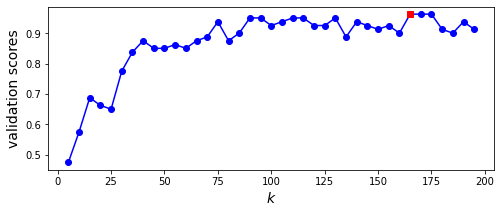

In [38]:
plt.figure(figsize=(8,3))
plt.plot(n_clusters,valid_accuracies,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("validation scores",fontsize=14)
best_index=np.argmax(valid_accuracies)
best_score=valid_accuracies[best_index]
best_k=n_clusters[best_index]
plt.plot(best_k,best_score,"rs")
plt.show()